## Exploratory Data Analysis Tinggi Gelombang Maksimum di Laut Utara dan Selatan Jawa
Pada notebook ini akan dilakukan exploratory data analysis (EDA) kondisi tinggi gelombang maksimum (Hmax) di Laut Utara dan Selatan Jawa. Informasi ini sangatlah penting untuk menjaga keamanan para nelayan. Sehingga disini akan dilakukan identifikasi waktu yang memiliki kondisi Hmax paling ekstrem, agar bisa menjadi referensi bagi para nelayan yg berlayar di Laut Utara dan Selatan Jawa. Sehingga untuk kedepannya bisa berhati-hati.

### Deskripsi Data yang Digunakan
Data yang digunakan dalam notebook ini merupakan data ERA5 yang diperoleh dari [situs Copernicus](https://cds.climate.copernicus.eu/#!/search?text=ERA5&type=dataset), dengan deskripsi data sebagai berikut:
- Resolusi ruang: 0.5 derajat
- Resolusi temporal: rata-rata 1 bulan
- Periode data: 1980-2019
- Variabel tinggi gelombang: tinggi gelombang signifikan (Hs)

Karena variabel tinggi gelombang yg ada pada data ini adalah **Hs**, maka perlu dikonversi menjadi **Hmax**, dengan perumusan berikut,
**Hmax = 2 * Hs**

In [1]:
# import library
from scipy.io import netcdf

# open file in a netCDF reader
#directory = 'Documents/Proyek KKP/Data Gelombang/'
wrf_file_name = 'monthly_mean_wave_ERA5_01_1980.nc'
nc = netcdf.netcdf_file(wrf_file_name, 'r')


In [2]:
import netCDF4 as nc4

metadata = nc4.Dataset(wrf_file_name, 'r')
metadata.variables

{'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (81,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (97,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'mdww': <class 'netCDF4._netCDF4.Variable'>
 float64 mdww(time, latitude, longitude)
     _FillValue: -32767.0
     missing_value: -32767
     units: degrees
     long_name: Mean direction of wind waves
     cell_methods: time: mean
 unlimited dimensions: time
 current shape = (1, 81, 97)
 filling on,
 'mpww': <class 'netCDF4._netCDF4.Variable'>
 float64 mpww(time, latitude, longitude)
     _FillValue: -32767.0
     missing_value: -32767
     units: s
     long_name: Mean period of wind waves
     cell_methods: tim

In [3]:
# look at available variables
nc.variables

OrderedDict([('latitude', <scipy.io.netcdf.netcdf_variable at 0x19537fc1f48>),
             ('longitude', <scipy.io.netcdf.netcdf_variable at 0x19537fc1f08>),
             ('mdww', <scipy.io.netcdf.netcdf_variable at 0x19537fc5348>),
             ('mpww', <scipy.io.netcdf.netcdf_variable at 0x19537fc55c8>),
             ('mwd', <scipy.io.netcdf.netcdf_variable at 0x19537fc5848>),
             ('mwp', <scipy.io.netcdf.netcdf_variable at 0x19537fc5ac8>),
             ('pp1d', <scipy.io.netcdf.netcdf_variable at 0x19537fc5dc8>),
             ('swh', <scipy.io.netcdf.netcdf_variable at 0x19537fc7048>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x19537fc7248>),
             ('wsk', <scipy.io.netcdf.netcdf_variable at 0x19537fc74c8>),
             ('wss', <scipy.io.netcdf.netcdf_variable at 0x19537fc5d88>)])

In [4]:
# look dimensions
nc.dimensions

OrderedDict([('latitude', 81), ('longitude', 97), ('time', None)])

In [5]:
import numpy as np
import pandas as pd

lat = pd.DataFrame(nc.variables['latitude'].data, columns=['latitude']).set_index(np.arange(0,81,1)).astype('float32')
lon = pd.DataFrame(nc.variables['longitude'].data, columns=['longitude']).set_index(np.arange(0,97,1)).astype('float32')

In [6]:
# look at a specific variables dimensions
nc.variables['wss'].dimensions

('time', 'latitude', 'longitude')

In [7]:
time = nc.variables['time'].data

In [8]:
# look at a specific variabels units
nc.variables['mpww'].units

b's'

In [9]:
swh = nc.variables['swh'].data
swh.shape

(1, 81, 97)

In [10]:
swh2 = np.append(swh, swh, axis=0)
swh2.shape

(2, 81, 97)

In [11]:
nc.variables['latitude'].data

array([ 20. ,  19.5,  19. ,  18.5,  18. ,  17.5,  17. ,  16.5,  16. ,
        15.5,  15. ,  14.5,  14. ,  13.5,  13. ,  12.5,  12. ,  11.5,
        11. ,  10.5,  10. ,   9.5,   9. ,   8.5,   8. ,   7.5,   7. ,
         6.5,   6. ,   5.5,   5. ,   4.5,   4. ,   3.5,   3. ,   2.5,
         2. ,   1.5,   1. ,   0.5,   0. ,  -0.5,  -1. ,  -1.5,  -2. ,
        -2.5,  -3. ,  -3.5,  -4. ,  -4.5,  -5. ,  -5.5,  -6. ,  -6.5,
        -7. ,  -7.5,  -8. ,  -8.5,  -9. ,  -9.5, -10. , -10.5, -11. ,
       -11.5, -12. , -12.5, -13. , -13.5, -14. , -14.5, -15. , -15.5,
       -16. , -16.5, -17. , -17.5, -18. , -18.5, -19. , -19.5, -20. ],
      dtype=float32)

In [12]:
swh[:,52,27]

array([0.87490611])

In [13]:
swh[0][1][2]

0.8786452626768537

In [14]:
import glob

my_files = [] 
for each_file in glob.glob('*.nc'):
   my_files.append(each_file)
print("There are " +str(len(my_files)) +" files")


There are 487 files


In [15]:
file_raw = pd.DataFrame(my_files, columns=['file name'])
file_raw

file name
0    Data_swh_u10_v10_ERA5_2017_2020.nc
1                          era5_test.nc
2     monthly_mean_wave_ERA5_01_1980.nc
3     monthly_mean_wave_ERA5_01_1981.nc
4     monthly_mean_wave_ERA5_01_1982.nc
..                                  ...
482                         swh_indo.nc
483               swh_indo_0817_0819.nc
484                    swh_indo_test.nc
485                   swh_indo_test1.nc
486              wind_indo_0817_0819.nc

[487 rows x 1 columns]

## Read and Load Desired Files

In [16]:
import re

def sort_file_name():
    
    # define file name
    file_name = "monthly_mean_wave_ERA5_01_1980.nc" #initiating file
    
    file_store = []
    
    for yyyy in range(1980, 2020): # our data have been recorded from 1980 - 2019
        
        yyyy = str(yyyy)
        file_name = re.sub(r"\d{4}", yyyy, file_name)
        for mm in range(1, 13):
            
            if mm < 10:
                mm = str(mm).zfill(2) + "_"# fill zero at the beginning of the string
            else:
                mm = str(mm) + "_"
                
            file_name = re.sub(r"\d{2}\_", mm, file_name)
            file_store.append(file_name)
      
    return file_store

In [17]:
def read_nc_file(list_files):
    
    list_swh = np.empty((1, 81, 97))
    list_time = np.empty((1))
    for file in list_files:
        nc_file = netcdf.netcdf_file(file, 'r')
        swh = nc_file.variables['swh'].data
        time = nc_file.variables['time'].data
        list_swh = np.concatenate([list_swh, swh], axis=0)
        list_time = np.concatenate([list_time, time], axis=0)
        
    return list_swh, list_time

In [18]:
print(swh.shape)


(1, 81, 97)


In [19]:
file_store = sort_file_name()
list_swh, list_time = read_nc_file(file_store)
list_swh.shape

C:\Users\titan\anaconda3\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


(481, 81, 97)

In [20]:
list_time.shape

(481,)

In [21]:
file_sup = pd.DataFrame(file_store, columns=['file name'])
file_sup

file name
0    monthly_mean_wave_ERA5_01_1980.nc
1    monthly_mean_wave_ERA5_02_1980.nc
2    monthly_mean_wave_ERA5_03_1980.nc
3    monthly_mean_wave_ERA5_04_1980.nc
4    monthly_mean_wave_ERA5_05_1980.nc
..                                 ...
475  monthly_mean_wave_ERA5_08_2019.nc
476  monthly_mean_wave_ERA5_09_2019.nc
477  monthly_mean_wave_ERA5_10_2019.nc
478  monthly_mean_wave_ERA5_11_2019.nc
479  monthly_mean_wave_ERA5_12_2019.nc

[480 rows x 1 columns]

### Set to specific location
Pada bagian ini akan dipilih masing-masing dua lokasi yang mewakili kondisi di Laut Utara dan Selatan Jawa, dengan:
- Laut Utara Jawa: Perairan Indramayu dan Pelabuhan Karang Ratu
- Laut Selatan Jawa: Perairan Cilacap dan Pangandaran

In [22]:
# 1
print("1")
display(lat[lat['latitude'] == np.round(-7.833)])
display(lon[lon['longitude'] == np.round(108.97)])

# 2
print("\n2")
display(lat[lat['latitude'] == np.round(-7.83)])
display(lon[lon['longitude'] == np.round(108.53)])

# 3
print("\n3")
display(lat[lat['latitude'] == np.round(-6.17)])
display(lon[lon['longitude'] == np.round(108.4)])

# 4
print("\n4")
display(lat[lat['latitude'] == np.round(-5.9)])
display(lon[lon['longitude'] == np.round(106.2)])

1


latitude
56      -8.0

longitude
34      109.0


2


latitude
56      -8.0

longitude
34      109.0


3


latitude
52      -6.0

longitude
32      108.0


4


latitude
52      -6.0

longitude
28      106.0

In [23]:
waktu = pd.period_range('1980-01', periods=480, freq='M')

In [24]:
time = pd.DataFrame(list_time[1:])
hs1 = pd.DataFrame(list_swh[1:,56,34], columns=['Cilacap']).set_index(waktu)
hs1.index = hs1.index.to_series().astype(str)
hs2 = pd.DataFrame(list_swh[1:,56,34], columns=['Pangandaran']).set_index(waktu)
hs2.index = hs1.index.to_series().astype(str)
hs3 = pd.DataFrame(list_swh[1:,52,32], columns=['Indramayu']).set_index(waktu)
hs3.index = hs1.index.to_series().astype(str)
hs4 = pd.DataFrame(list_swh[1:,52,27], columns=['Pelabuhan Karang Ratu']).set_index(waktu)
hs4.index = hs1.index.to_series().astype(str)
hs4

Pelabuhan Karang Ratu
1980-01               0.874906
1980-02               0.686353
1980-03               0.728865
1980-04               0.668049
1980-05               0.694449
...                        ...
2019-08               0.982978
2019-09               0.913608
2019-10               0.933700
2019-11               0.775037
2019-12               0.634311

[480 rows x 1 columns]

In [25]:
hmax1 = 2 * hs1
hmax2 = 2 * hs2
hmax3 = 2 * hs3
hmax4 = 2 * hs4

In [26]:
nc.variables['time'].units

b'hours since 1900-01-01 00:00:00.0'

## Plotting Data

In [27]:
import folium

# Create interactive map with default basemap
my_map = folium.Map(location=[-7.833, 108.97],
                   zoom_start=6.5)

# Pass a string in popup parameter 
folium.Marker([-7.833, 108.97], 
               popup = ' Cilacap ', icon=folium.Icon(color='red')).add_to(my_map)

folium.Marker([-7.833, 108.53], 
               popup = ' Pangandaran ', icon=folium.Icon(color='blue')).add_to(my_map)

folium.Marker([-6.16, 108.4], 
               popup = ' Indramayu ', icon=folium.Icon(color='green')).add_to(my_map)

folium.Marker([-5.9, 106.2], 
               popup = ' Pelabuhan Karang Ratu ', icon=folium.Icon(color='black')).add_to(my_map)

my_map

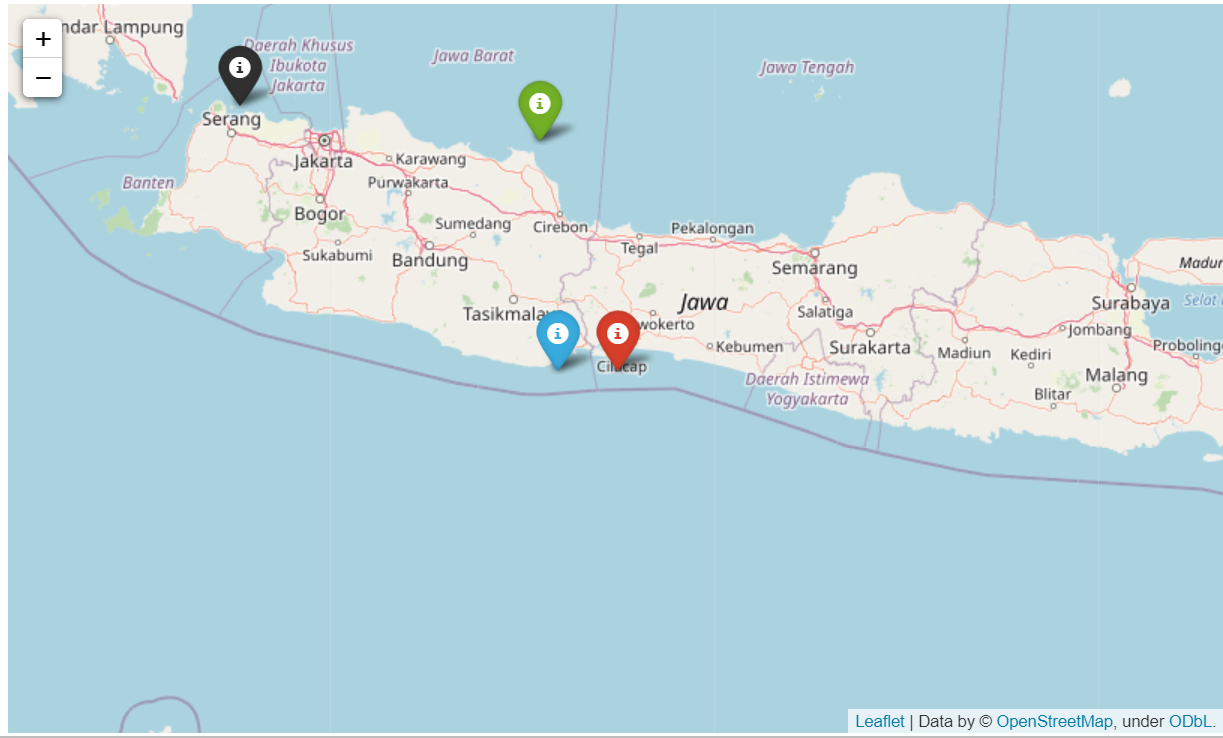

In [28]:
from IPython.display import Image, display
display(Image(filename='lokasi.png', embed=True))

### Legend Lokasi
- **Merah: Cilacap**
- **Biru: Pangandaran**
- **Hijau: Indramayu**
- **Hitam: Pelabuhan Karang Ratu**

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams["font.weight"] = "bold"
rcParams["axes.labelweight"] = "bold"

rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

rcParams['legend.fontsize'] = 16

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'STIXGeneral:italic'
rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'

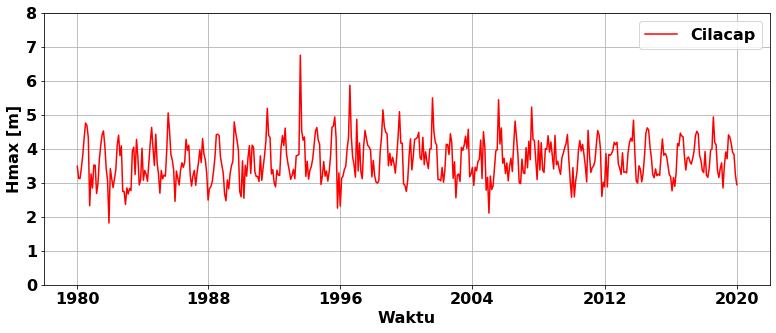

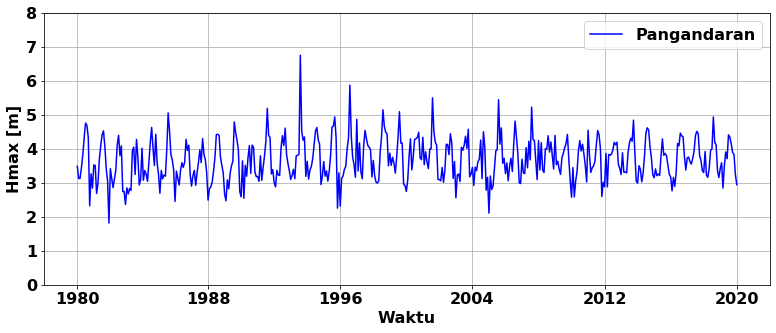

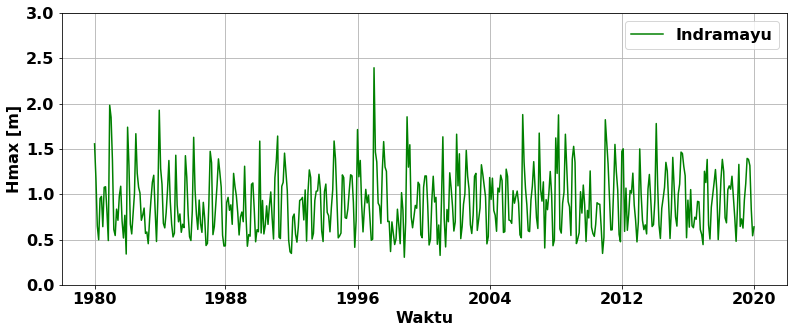

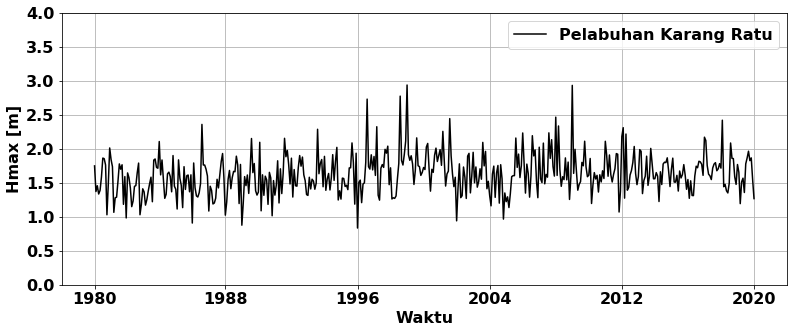

In [30]:
def plot_data(data, lokasi, warna):
    data.plot(figsize=(13,5), linewidth=1.5, color=warna)
    plt.xlabel('Waktu', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0, np.round(np.max(data)[0]+1))
    plt.xticks([0, 95, 191, 287, 383, 479], 
               [1980, 1988, 1996, 2004, 2012, 2020])
    plt.legend(lokasi)
    plt.grid(True)

plot_data(hmax1, lokasi=["Cilacap"], warna=["red"])
plot_data(hmax2, lokasi=["Pangandaran"], warna=["blue"])
plot_data(hmax3, lokasi=["Indramayu"], warna=["green"])
plot_data(hmax4, lokasi=["Pelabuhan Karang Ratu"], warna=["black"])

### Next
Untuk melihat perbedaan kondisi Hmax disetiap lokasi, maka perlu dibuat overlay plot time series. Selain itu, disini juga akan dianalisi kondisi Hmax pada periode tahun **2017 - 2019**.

### Overlay Hmax di setiap lokasi

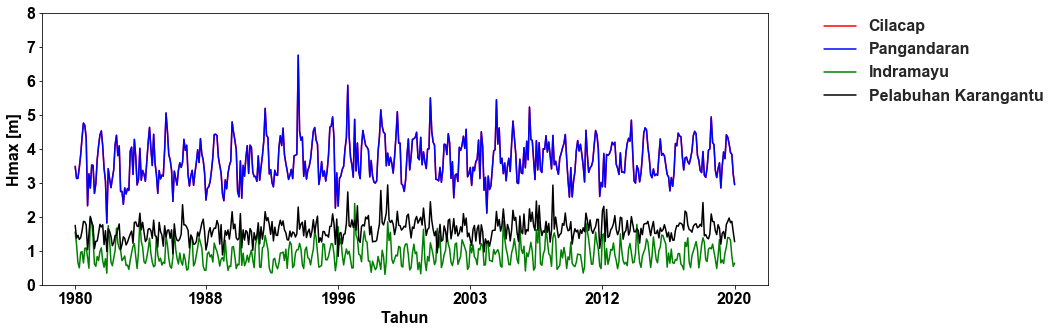

In [31]:
import matplotlib

df_list_data = pd.concat([hmax1, hmax2, hmax3, hmax4], axis=1)

# overlay all data from each location
ax, fig = plt.subplots(figsize=(13,5))
matplotlib.style.use('seaborn-whitegrid')
plt.plot(hmax1, linewidth=1.5, color='red', label='Cilacap')
plt.plot(hmax2, linewidth=1.5, color='blue', label='Pangandaran')
plt.plot(hmax3, linewidth=1.5, color='green', label='Indramayu')
plt.plot(hmax4, linewidth=1.5, color='black', label='Pelabuhan Karangantu')
plt.xlabel('Tahun', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0, np.round(np.max(df_list_data.max())+1))
plt.xticks([0, 95, 191, 287, 383, 479], 
           [1980, 1988, 1996, 2003, 2012, 2020])
#plt.grid()
plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karangantu'], bbox_to_anchor=(1.4, 1.03))
#plt.legend(bbox_to_anchor=(1.05, 1.0))

### Overlay Hmax 3 tahun terakhir disetiap lokasi

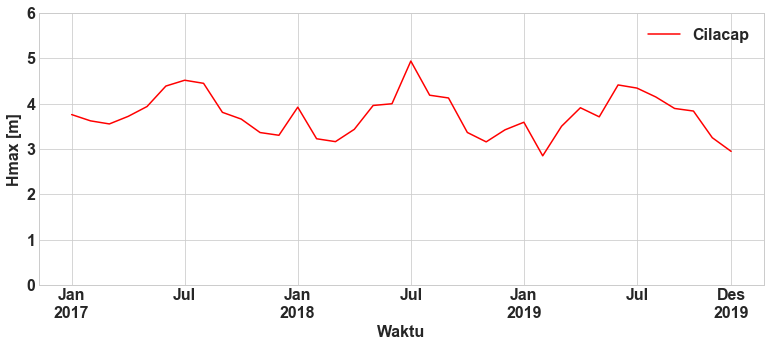

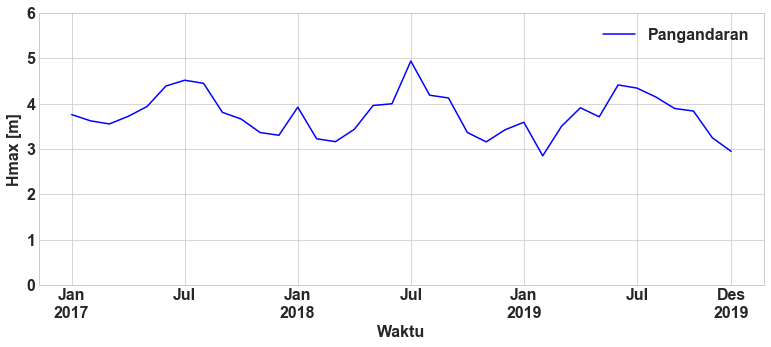

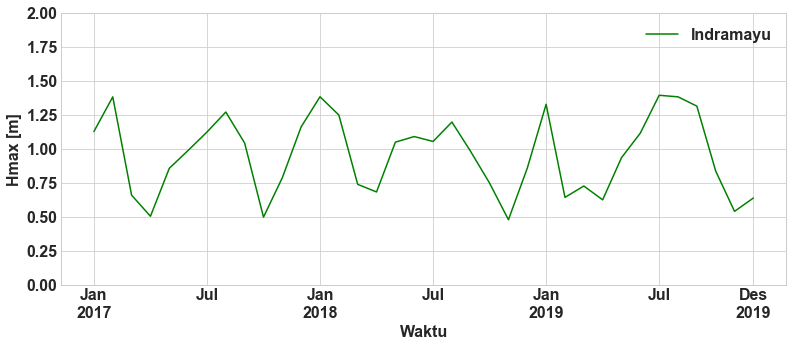

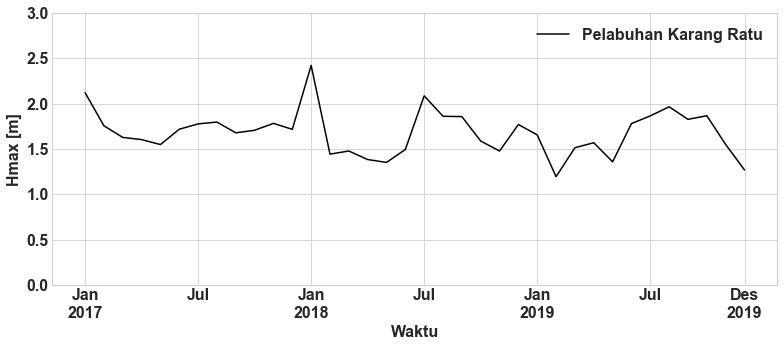

In [32]:
import matplotlib

def plot_data_last_3_years(data, lokasi, warna):
    matplotlib.style.use('seaborn-whitegrid')
    data.plot(figsize=(13,5), linewidth=1.5, color=warna)
    plt.xlabel('Waktu', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0, np.round(np.max(data)[0]+1))
    plt.xticks([0, 6, 12, 18, 24, 30, 35], 
               ['Jan\n2017', 'Jul', 'Jan\n2018', 'Jul', 'Jan\n2019', 'Jul', 'Des\n2019'])
    plt.legend(lokasi)
    #plt.grid(True)
    
plot_data_last_3_years(hmax1[-36:], lokasi=["Cilacap"], warna=["red"])
plot_data_last_3_years(hmax2[-36:], lokasi=["Pangandaran"], warna=["blue"])
plot_data_last_3_years(hmax3[-36:], lokasi=["Indramayu"], warna=["green"])
plot_data_last_3_years(hmax4[-36:], lokasi=["Pelabuhan Karang Ratu"], warna=["black"])

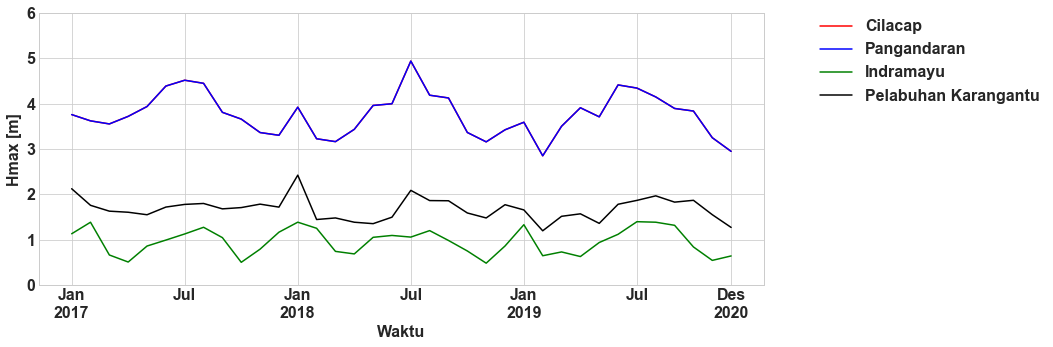

In [33]:
df_list_data3 = pd.concat([hmax1[-36:], hmax2[-36:], hmax3[-36:], hmax4[-36:]], axis=1)

# overlay all data from each location
matplotlib.style.use('seaborn-whitegrid')
ax, fig = plt.subplots(figsize=(13,5))
plt.plot(hmax1[-36:], linewidth=1.5, color='red', label='Cilacap')
plt.plot(hmax2[-36:], linewidth=1.5, color='blue', label='Pangandaran')
plt.plot(hmax3[-36:], linewidth=1.5, color='green', label='Indramayu')
plt.plot(hmax4[-36:], linewidth=1.5, color='black', label='Pelabuhan Karang Ratu')
plt.xlabel('Waktu', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0, np.round(np.max(df_list_data3.max())+1))
plt.xticks([0, 6, 12, 18, 24, 30, 35], 
           ['Jan\n2017', 'Jul', 'Jan\n2018', 'Jul', 'Jan\n2019', 'Jul', 'Des\n2020'])
#plt.grid()
plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karangantu'], bbox_to_anchor=(1.4, 1.03))
#plt.legend(bbox_to_anchor=(1.05, 1.0))

### Inspeksi Hmax ekstrem di setiap lokasi
Untuk meng-inspeksi kondisi Hmax, disini dibuat plot interaktif dgn menggunakan **plotly**.

In [34]:
import plotly

plotly.offline.init_notebook_mode(connected=True)

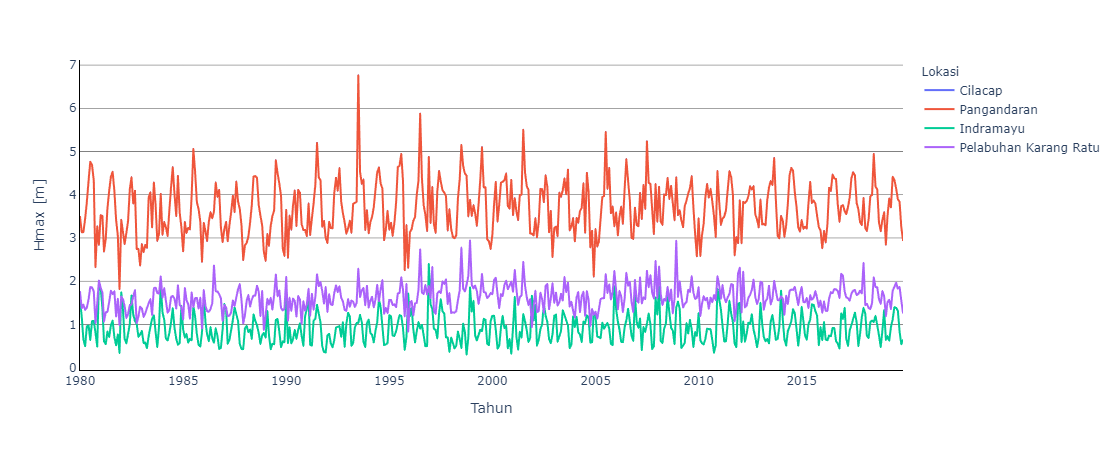

In [35]:
# Using plotly.express
import plotly.express as px

fig = px.line(df_list_data, labels={
    'value':'Hmax [m]',
    'index':'Tahun',
    'variable':'Lokasi'
})
fig.update_layout({
    'plot_bgcolor':'rgba(0,0,0,0)',
    'paper_bgcolor':'rgba(0,0,0,0)'
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='black')
fig.show()

### Insights
Dari plot time series ini, secara visual kita bisa tahu kalau:
- Tinggi gelombang maksimum (Hmax) di **Laut Selatan Jawan** (Cilacap dan Pangandaran) jauh lebih tinggi dibandingkan Hmax di **Laut Utara Jawa** (Indramayu dan Pelabuhan Karang Ratu)
- Selatan Jawa (Cilacap dan Indramayu) Hmax Ekstrem paling sering muncul saat musim timur (JJA)
- Utara Jawa (Indramayu dan Pelabuhan Karang Ratu) Hmax Ekstrem paling sering muncul saat musim barat, tapi cukup sering muncul saat musim timur dan peralihan
- Untuk melihat bulan mana yg paling sering muncul Hmax ekstremnya, maka perlu dibuat plot perbulannya

Perlu diketahui, kesimpulan diatas diperoleh secara kualitatif, untuk itu perlu dikuantifikasi untuk memastikan kebenarannya, seperti yg dilakukan selanjutnya.

Glossary:
- DJF: Desember-Januari-Februari (musim barat)
- MAM: Maret-April-Mei (musim peralihan I)
- JJA: Juni-Juli-Agustus (musim timur)
- SON: September-Oktober-November (musim peralihan II)

### Next: Overlay Plot per Bulan
- Perlu dibuat aggregasi data rata2 per bulan
- Dibuat barplot per lokasi
- Dibuat overlay barplot setiap lokasi

Referensi: [Visualisasi data](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/), [tema matplotlib](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [36]:
df_list_data_by_month = df_list_data.reset_index()

df_list_data_by_month[['year', 'month']] = df_list_data_by_month['index'].str.split('-', expand=True)
df_list_data_by_month.head()

index   Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu  year  \
0  1980-01  3.487332     3.487332   1.555658               1.749812  1980   
1  1980-02  3.130330     3.130330   1.174890               1.372705  1980   
2  1980-03  3.131297     3.131297   0.648947               1.457730  1980   
3  1980-04  3.446754     3.446754   0.496943               1.336098  1980   
4  1980-05  3.829299     3.829299   0.953408               1.388897  1980   

  month  
0    01  
1    02  
2    03  
3    04  
4    05

In [37]:
df_list_data3_by_month = df_list_data3.reset_index()
df_list_data3_by_month[['year', 'month']] = df_list_data3_by_month['index'].str.split('-', expand=True)
df_list_data3_by_month.head()

index   Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu  year  \
0  2017-01  3.759765     3.759765   1.128702               2.122876  2017   
1  2017-02  3.621387     3.621387   1.383565               1.756665  2017   
2  2017-03  3.553356     3.553356   0.660476               1.627832  2017   
3  2017-04  3.720578     3.720578   0.504923               1.603907  2017   
4  2017-05  3.937788     3.937788   0.857825               1.548786  2017   

  month  
0    01  
1    02  
2    03  
3    04  
4    05

In [38]:
# Aggregating data by month, with mean value
df_list_data_by_month = pd.pivot_table(df_list_data_by_month, index=['month'], aggfunc= np.mean)
df_list_data3_by_month = pd.pivot_table(df_list_data3_by_month, index=['month'], aggfunc= np.mean)
print('==== Rata-rata Hmax untuk setiap bulan pada periode tahun 1980-2019 ====')
display(df_list_data_by_month)
print('\n==== Rata-rata Hmax untuk setiap bulan pada periode tahun 2017-2019 ====')
display(df_list_data3_by_month)

==== Rata-rata Hmax untuk setiap bulan pada periode tahun 1980-2019 ====


Cilacap  Indramayu  Pangandaran  Pelabuhan Karang Ratu
month                                                         
01     3.300846   1.250723     3.300846               1.629506
02     3.301476   1.115130     3.301476               1.610961
03     3.249672   0.718302     3.249672               1.528660
04     3.385018   0.588641     3.385018               1.456391
05     3.816697   0.793625     3.816697               1.480753
06     4.152646   0.950946     4.152646               1.655577
07     4.518611   1.132654     4.518611               1.824993
08     4.314914   1.149067     4.314914               1.781147
09     4.115525   0.949798     4.115525               1.813708
10     3.489047   0.613378     3.489047               1.543966
11     3.234282   0.579572     3.234282               1.559501
12     3.215184   1.116118     3.215184               1.656544


==== Rata-rata Hmax untuk setiap bulan pada periode tahun 2017-2019 ====


Cilacap  Indramayu  Pangandaran  Pelabuhan Karang Ratu
month                                                         
01     3.757949   1.280686     3.757949               2.066809
02     3.232388   1.092390     3.232388               1.464806
03     3.405868   0.709319     3.405868               1.540031
04     3.688565   0.604901     3.688565               1.518864
05     3.869644   0.947990     3.869644               1.419726
06     4.267533   1.066079     4.267533               1.664402
07     4.601360   1.191820     4.601360               1.909857
08     4.262144   1.284780     4.262144               1.874967
09     3.943591   1.113207     3.943591               1.787766
10     3.621021   0.695052     3.621021               1.720709
11     3.256761   0.603282     3.256761               1.603553
12     3.224736   0.887239     3.224736               1.585307

In [39]:
import matplotlib

def plot_bar(data, lokasi, warna):
    matplotlib.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,5))
    data.plot(kind='bar', color=warna)
    
    plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0)
    plt.xlabel('Bulan', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0,6)
    daerah = 'Rata-rata Hmax per Bulan di ' + lokasi + '\nTahun 1980-2019'
    plt.title(daerah, fontsize=16, fontweight='bold')


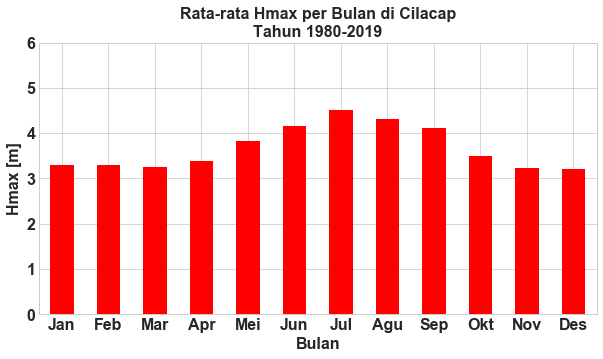

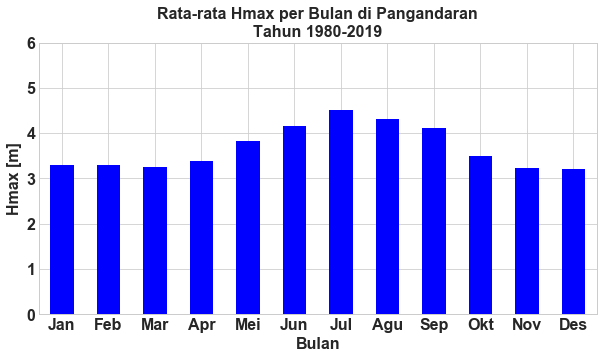

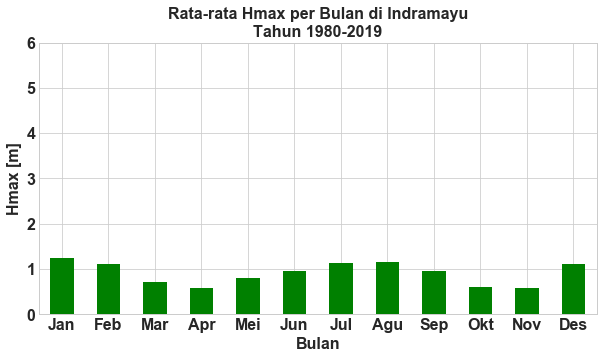

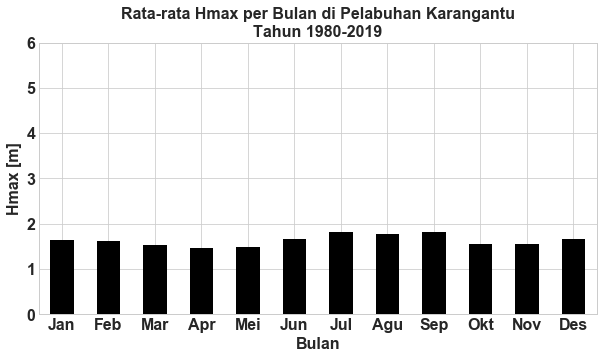

In [40]:
plot_bar(df_list_data_by_month['Cilacap'], lokasi='Cilacap', warna='red')
plot_bar(df_list_data_by_month['Pangandaran'], lokasi='Pangandaran', warna='blue')
plot_bar(df_list_data_by_month['Indramayu'], lokasi='Indramayu', warna='green')
plot_bar(df_list_data_by_month['Pelabuhan Karang Ratu'], lokasi='Pelabuhan Karangantu', warna='black')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019')

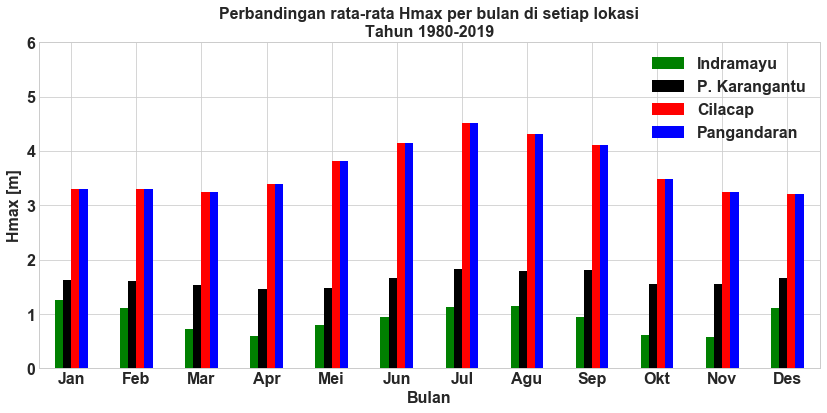

In [41]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.legend(['Indramayu','P. Karangantu','Cilacap','Pangandaran'])
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019')

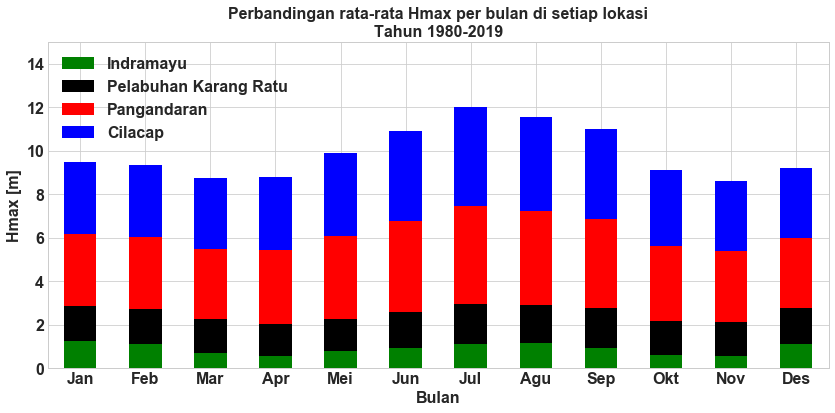

In [42]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'],
                                                        stacked=True,
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,15)
#plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karangantu'])
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

### Insight
Dari barplot diatas dapat dipastikan bahwa, kondisi Hmax paling ekstrem di masing-masing lokasi adalah pada saat:
- Cilacap: JJA (paling ekstrem di bulan Juli)
- Pangandaran: idem Cilacap
- Indramayu: DJF (Januari) dan JJA (Agustus), dgn DJF paling ekstrem
- Pelabuhan Karang Ratu: DJF (Januari) dan JJA (Juli), dgn JJA paling ekstrem

Glossary:
- DJF: Desember-Januari-Februari (musim barat)
- MAM: Maret-April-Mei (musim peralihan I)
- JJA: Juni-Juli-Agustus (musim timur)
- SON: September-Oktober-November (musim peralihan II)

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 2017-2019')

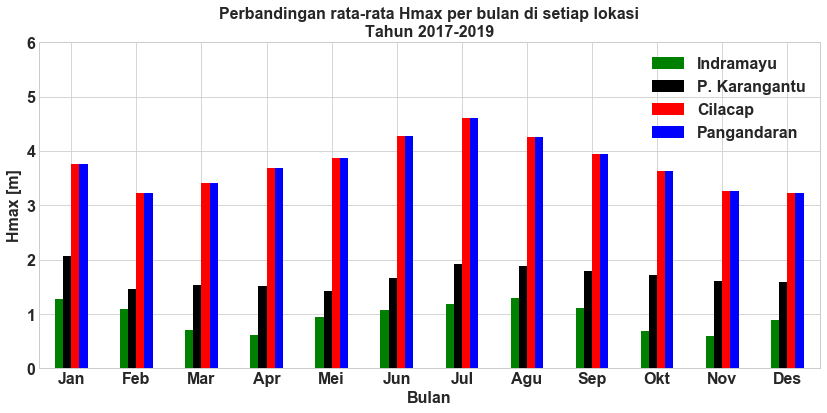

In [43]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data3_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.legend(['Indramayu','P. Karangantu','Cilacap','Pangandaran'])
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 2017-2019', fontsize=16, fontweight='bold')

### Insight
Dari diagram bar diatas, kita bisa tahu bahwa rata-rata untuk setiap bulan, baik itu pada periode 1980-2019 atau 2017-2019, diketahui bahwa:
- Cilacap: Kondisi bulan paling ekstrem terjadi pada bulan **Juli**
- Pangandaran: Kondisi bulan paling ekstrem terjadi pada bulan **Juli**
- Indramayu: Kondisi bulan paling ekstrem terjadi pada bulan **Januari**
- Pelabuhan Karang Ratu: Kondisi bulan paling ekstrem terjadi pada bulan **Januari**

Dari sini terlihat jelas bahwa, untuk perairan di **Laut Utara Jawa**, kondisi paling ekstrem terjadi ketika bulan **Januari** (musim barat), sedangkan untuk perairan **Selatan Jawa**, kondisi paling ekstrem terjadi ketika bulan **Juli** (musim timur).

### Agregasi data per musim

In [44]:
# Agregasi data berdasarkan musim
df_list_data_by_season = pd.DataFrame(columns=['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'])
df_list_data_by_season.loc['DJF'] = df_list_data_by_month.iloc[[-1,0,1]].mean(axis=0)
df_list_data_by_season.loc['MAM'] = df_list_data_by_month.iloc[[2,3,4]].mean(axis=0)
df_list_data_by_season.loc['JJA'] = df_list_data_by_month.iloc[[5,6,7]].mean(axis=0)
df_list_data_by_season.loc['SON'] = df_list_data_by_month.iloc[[8,9,10]].mean(axis=0)
df_list_data_by_season

Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu
DJF  3.272502     3.272502   1.160657               1.632337
MAM  3.483796     3.483796   0.700189               1.488601
JJA  4.328723     4.328723   1.077556               1.753906
SON  3.612951     3.612951   0.714249               1.639058

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019')

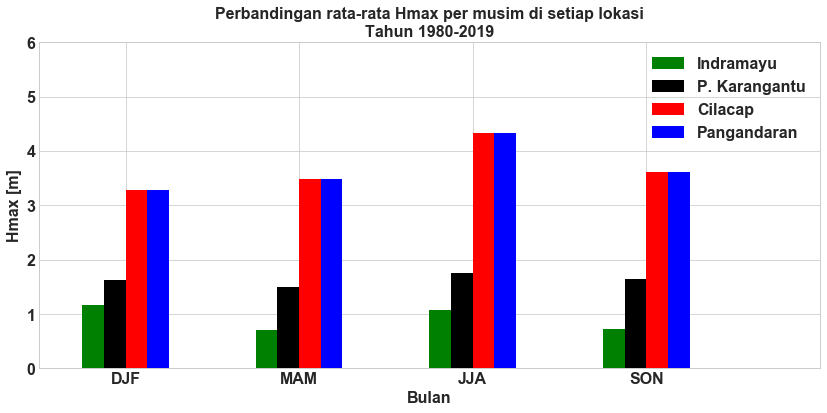

In [45]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_season[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['DJF','MAM','JJA','SON'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.legend(['Indramayu','P. Karangantu','Cilacap','Pangandaran'])
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

In [46]:
# Agregasi data berdasarkan musim
df_list_data3_by_season = pd.DataFrame(columns=['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'])
df_list_data3_by_season.loc['DJF'] = df_list_data3_by_month.iloc[[-1,0,1]].mean(axis=0)
df_list_data3_by_season.loc['MAM'] = df_list_data3_by_month.iloc[[2,3,4]].mean(axis=0)
df_list_data3_by_season.loc['JJA'] = df_list_data3_by_month.iloc[[5,6,7]].mean(axis=0)
df_list_data3_by_season.loc['SON'] = df_list_data3_by_month.iloc[[8,9,10]].mean(axis=0)
df_list_data3_by_season

Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu
DJF  3.405024     3.405024   1.086772               1.705641
MAM  3.654692     3.654692   0.754070               1.492873
JJA  4.377012     4.377012   1.180893               1.816409
SON  3.607124     3.607124   0.803847               1.704009

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019')

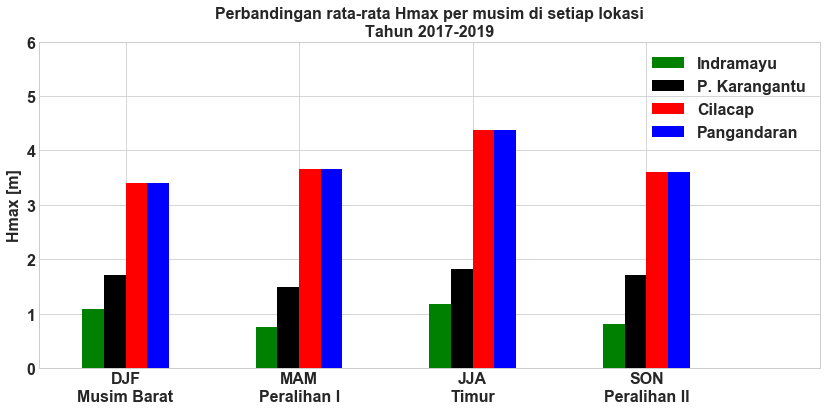

In [47]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data3_by_season[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['DJF\nMusim Barat','MAM\nPeralihan I','JJA\nTimur','SON\nPeralihan II'], 
               rotation=0
)

#plt.xlabel('Musim', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.legend(['Indramayu','P. Karangantu','Cilacap','Pangandaran'])
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019', fontsize=16, fontweight='bold')

In [48]:
df_list_data_by_season_T = df_list_data_by_season.transpose()
df_list_data_by_season_T

DJF       MAM       JJA       SON
Cilacap                3.272502  3.483796  4.328723  3.612951
Pangandaran            3.272502  3.483796  4.328723  3.612951
Indramayu              1.160657  0.700189  1.077556  0.714249
Pelabuhan Karang Ratu  1.632337  1.488601  1.753906  1.639058

In [49]:
df_list_data3_by_season_T = df_list_data3_by_season.transpose()
df_list_data3_by_season_T

DJF       MAM       JJA       SON
Cilacap                3.405024  3.654692  4.377012  3.607124
Pangandaran            3.405024  3.654692  4.377012  3.607124
Indramayu              1.086772  0.754070  1.180893  0.803847
Pelabuhan Karang Ratu  1.705641  1.492873  1.816409  1.704009

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019')

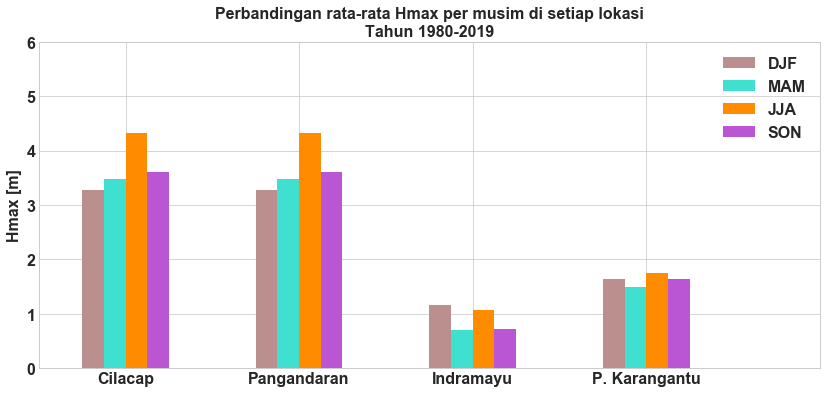

In [50]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data_by_season_T.plot(
                               kind='bar', 
                               color=['rosybrown','turquoise','darkorange','mediumorchid'], 
                               figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['Cilacap','Pangandaran','Indramayu','P. Karangantu'], 
               rotation=0
)

#plt.xlabel('Lokasi', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 1980-2019', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019')

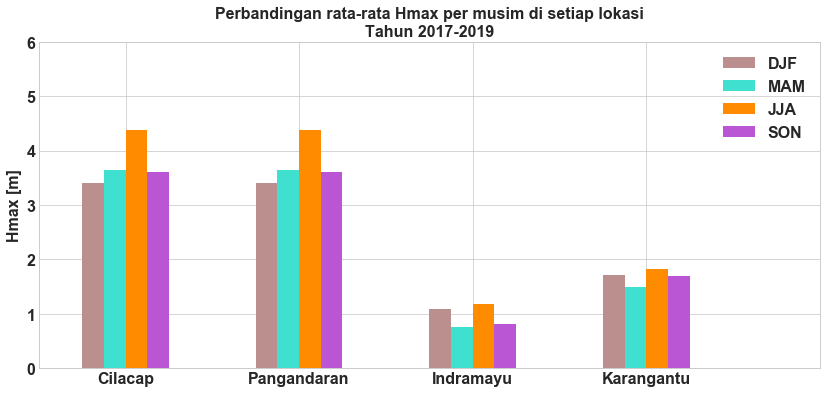

In [51]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data3_by_season_T.plot(
                               kind='bar', 
                               color=['rosybrown','turquoise','darkorange','mediumorchid'], 
                               figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['Cilacap','Pangandaran','Indramayu','Karangantu'], 
               rotation=0
)

#plt.xlabel('Lokasi', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2017-2019', fontsize=16, fontweight='bold')

### Insight
Diagram bar diatas digunakan untuk menganalisa kondisi musim yg paling ekstrem di masing-masing lokasi, yaitu:
- Cilacap: musim paling ekstrem terjadi pada **musim timur (JJA)**
- Pangandaran: musim paling ekstrem terjadi pada **musim timur (JJA)**
- Indramayu: musim paling ekstrem terjadi pada **musim timur (JJA)**
- Pelabuhan Karang Ratu: musim paling ekstrem terjadi pada **musim timur (JJA)**

Dari sini ada **temuan menarik** untuk **Indramayu** dan **Pelabuhan Karang Ratu**, karena seperti yg kita tahu bahwa keduanya memiliki kondisi **bulan** paling ekstrem pada bulan **Januari**, sedangkan ketika dibuat rata-rata per musim, kondisi **musim** paling ekstrem adalah **musim timur**. 

Temuan yg disebutkan pada paragraf sebelumnya terjadi karena, pada bulan **Desember** dan **Februari**, kondisi Hmax-nya tidak begitu ekstrem, jika dibandingkan bulan **Juni**, **Juli**, dan **Agustus**. Sehingga ketika dirata-ratakan, nilai Hmax pada **musim barat (DJF) cenderung lebih kecil dibanding musim timur (JJA)**.

Glossary:
- DJF: Desember-Januari-Februari (**musim barat**)
- MAM: Maret-April-Mei (**musim peralihan I**)
- JJA: Juni-Juli-Agustus (**musim timur**)
- SON: September-Oktober-November (**musim peralihan II**)

# Next Task
- Download Data **'INTERIM'** angin dan gelombang resolusi temporal 6 jam perioda 2017-2019 (Solve)
- Download Data **'ERA 5'** angin dan gelombang resolusi temporal 1 jam perioda 2017-2019 (Solve)
- Bandingin Hmax dgn data angin (time series dan bar plot)
- Lalu bandingkan hasilnya dgn yg klimatologi
- Cari data Siklon Tropis 2017-2019 (bulan apa aja)

**Spesifikasi Data 'INTERIM' ECMWF**:
- resolusi spasial: 0.125 deg
- resolusi temporal: 6 jam

**Spesifikasi Data 'ERA 5' Copernicus**:
- resolusi spasial: 0.5 deg
- resolusi temporal: 1 jam

In [52]:
# membaca data
nc_interim = nc4.Dataset('swh_indo_0817_0819.nc', 'r')
nc_interim.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (401,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (121,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (4384,)
 filling on, default _FillValue of -2147483647 used,
 'swh': <class 'netCDF4._netCDF4.Variable'>
 int16 swh(time, latitude, longitude)
     scale_factor: 7.575925874411391e-05
     add_offset: 2.5296925353423374
     _FillValue: -32767
     missing_value: -32767
     units: m
     long_name: Significant height

In [53]:
# set to variable
lon_interim = nc_interim.variables['longitude'][:]
lat_interim = nc_interim.variables['latitude'][:]
time_interim = nc_interim.variables['time'][:]
swh_interim = nc_interim.variables['swh'][:]

print('== Shape of Variables ===')
print('longitude: ', lon_interim.shape)
print('latitude: ', lat_interim.shape)
print('time: ', time_interim.shape)
print('swh: ', swh_interim.shape)

== Shape of Variables ===
longitude:  (401,)
latitude:  (121,)
time:  (4384,)
swh:  (4384, 121, 401)


In [54]:
# convert to dataframe
lon_interim = pd.DataFrame(lon_interim, columns=['longitude']).set_index(np.arange(0,401,1)).astype('float32')
lat_interim = pd.DataFrame(lat_interim, columns=['latitude']).set_index(np.arange(0,121,1)).astype('float32')

display(lon_interim.head())
display(lat_interim.head())

longitude
0    100.000
1    100.125
2    100.250
3    100.375
4    100.500

latitude
0     5.000
1     4.875
2     4.750
3     4.625
4     4.500

In [55]:
# convert to dataframe, and then to datetime
time_interim = pd.DataFrame(time_interim, columns=['waktu'], dtype='int64')
time_interim['waktu'] = pd.to_datetime(time_interim['waktu'], unit='h', origin=pd.Timestamp('1900-01-01 00:00:00'))

display(time_interim.head())
display(time_interim.tail())

waktu
0 2016-08-31 00:00:00
1 2016-08-31 06:00:00
2 2016-08-31 12:00:00
3 2016-08-31 18:00:00
4 2016-09-01 00:00:00

waktu
4379 2019-08-30 18:00:00
4380 2019-08-31 00:00:00
4381 2019-08-31 06:00:00
4382 2019-08-31 12:00:00
4383 2019-08-31 18:00:00

### Konversi Hs ke Hmax
Hmax = 2 * Hs

In [56]:
hmax_interim = 2 * swh_interim

### Set to specific location
Disini akan dipilih lokasi berikut:
- Cilacap
- Pangandaran
- Indramayu
- Pelabuhan Karang Ratu

In [57]:
# 1
print("Cilacap")
display(lat_interim[lat_interim['latitude'] == np.round(-7.833)]) # Dibulatkan sesuai nilai latitude di gridnya 
display(lon_interim[lon_interim['longitude'] == np.round(108.97)])

# 2
print("\nPangandaran")
display(lat_interim[lat_interim['latitude'] == np.round(-7.83)])
display(lon_interim[lon_interim['longitude'] == np.round(108.53)])

# 3
print("\nIndramayu")
display(lat_interim[lat_interim['latitude'] == np.round(-6.17)])
display(lon_interim[lon_interim['longitude'] == np.round(108.4)])

# 4
print("\nPelabuhan Karang Ratu")
display(lat_interim[lat_interim['latitude'] == np.round(-5.9)])
display(lon_interim[lon_interim['longitude'] == np.round(106.2)])

Cilacap


latitude
104      -8.0

longitude
72      109.0


Pangandaran


latitude
104      -8.0

longitude
72      109.0


Indramayu


latitude
88      -6.0

longitude
64      108.0


Pelabuhan Karang Ratu


latitude
88      -6.0

longitude
48      106.0

### Define variable Hmax for each location

In [58]:
hmax_interim_cilacap = pd.DataFrame(hmax_interim[:,104,72], columns=['Cilacap']).set_index(time_interim['waktu'])
hmax_interim_pangandaran = pd.DataFrame(hmax_interim[:,104,72], columns=['Pangandaran']).set_index(time_interim['waktu'])
hmax_interim_indramayu = pd.DataFrame(hmax_interim[:,88,64], columns=['Indramayu']).set_index(time_interim['waktu'])
hmax_interim_ratu = pd.DataFrame(hmax_interim[:,88,48], columns=['Pelabuhan Karang Ratu']).set_index(time_interim['waktu'])

print(hmax_interim_ratu.shape)
hmax_interim_ratu.head()

(4384, 1)


Pelabuhan Karang Ratu
waktu                                     
2016-08-31 00:00:00               1.213088
2016-08-31 06:00:00               1.237027
2016-08-31 12:00:00               1.260361
2016-08-31 18:00:00               1.246270
2016-09-01 00:00:00               1.244906

### Plotting the data

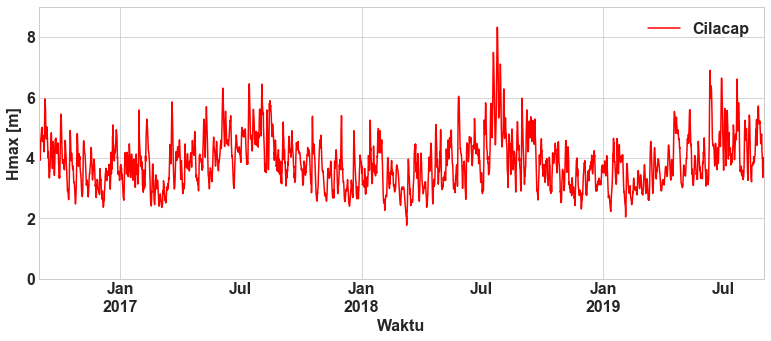

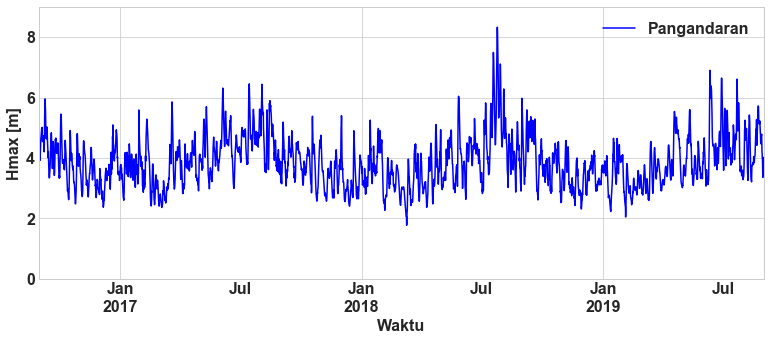

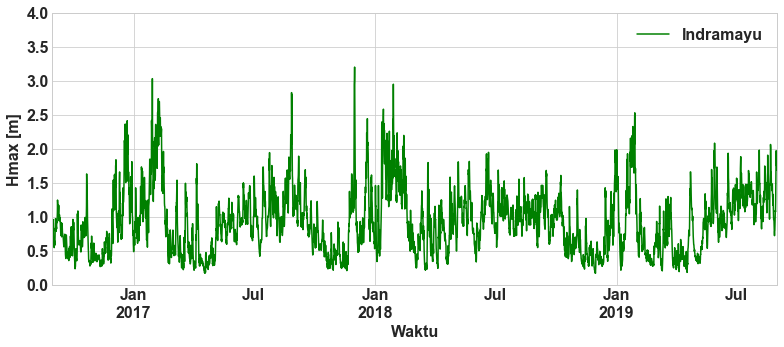

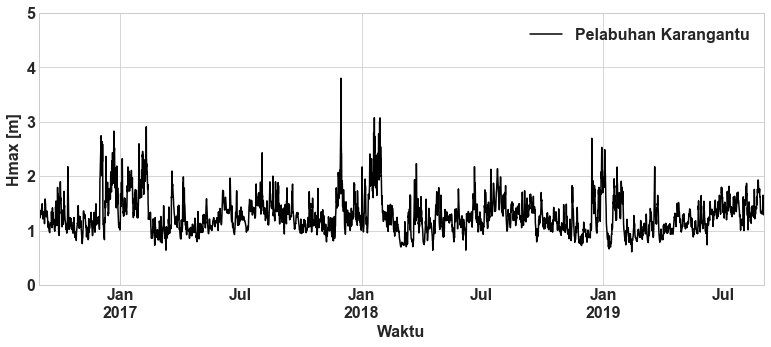

In [59]:
def plot_data(data, lokasi, warna):
    matplotlib.style.use('seaborn-whitegrid')
    data.plot(figsize=(13,5), linewidth=1.5, color=warna)
    plt.xlabel('Waktu', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0, np.round(np.max(data)[0]+1))
    #plt.xticks([0, 731, 1461, 2192, 2923, 3653, 4384], 
    #           ['Agu 2016', 'Feb 2017', 'Agu 2017', 'Feb 2018', 'Agu 2018', 'Jan 2019','Agu 2019'])
    plt.legend(lokasi)
    #plt.grid(True)
    
    
plot_data(hmax_interim_cilacap, lokasi=["Cilacap"], warna=["red"])
plot_data(hmax_interim_pangandaran, lokasi=["Pangandaran"], warna=["blue"])
plot_data(hmax_interim_indramayu, lokasi=["Indramayu"], warna=["green"])
plot_data(hmax_interim_ratu, lokasi=["Pelabuhan Karangantu"], warna=["black"])

In [60]:
df_list_data_interim = pd.concat([hmax_interim_cilacap, hmax_interim_pangandaran, hmax_interim_indramayu, hmax_interim_ratu], axis=1)
df_list_data_interim.head()

Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu
waktu                                                                       
2016-08-31 00:00:00  4.501797     4.501797   0.832473               1.213088
2016-08-31 06:00:00  4.450129     4.450129   0.964294               1.237027
2016-08-31 12:00:00  4.446947     4.446947   0.885959               1.260361
2016-08-31 18:00:00  4.332702     4.332702   0.869292               1.246270
2016-09-01 00:00:00  4.229518     4.229518   0.936566               1.244906

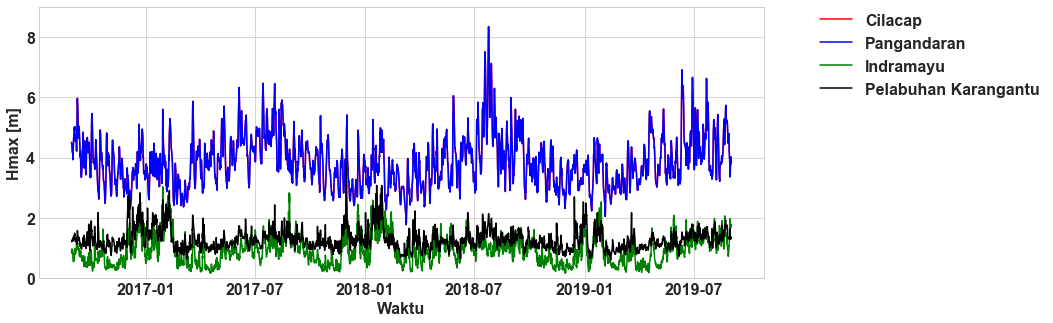

In [61]:
import matplotlib
import matplotlib.dates as mdates

# overlay all data from each location
fig, ax = plt.subplots(figsize=(13,5))
matplotlib.style.use('seaborn-whitegrid')
plt.plot(hmax_interim_cilacap, linewidth=1.5, color='red', label='Cilacap')
plt.plot(hmax_interim_pangandaran, linewidth=1.5, color='blue', label='Pangandaran')
plt.plot(hmax_interim_indramayu, linewidth=1.5, color='green', label='Indramayu')
plt.plot(hmax_interim_ratu, linewidth=1.5, color='black', label='Pelabuhan Karangantu')
plt.xlabel('Waktu', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0, np.round(np.max(df_list_data_interim.max())+1))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
#plt.xticks([0, 731, 1461, 2192, 2923, 3653, 4384], 
#           ['Agu 2016', 'Feb 2017', 'Agu 2017', 'Feb 2018', 'Agu 2018', 'Jan 2019','Agu 2019'])
#plt.grid()
plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karangantu'], bbox_to_anchor=(1.4, 1.03))
#plt.legend(bbox_to_anchor=(1.05, 1.0))

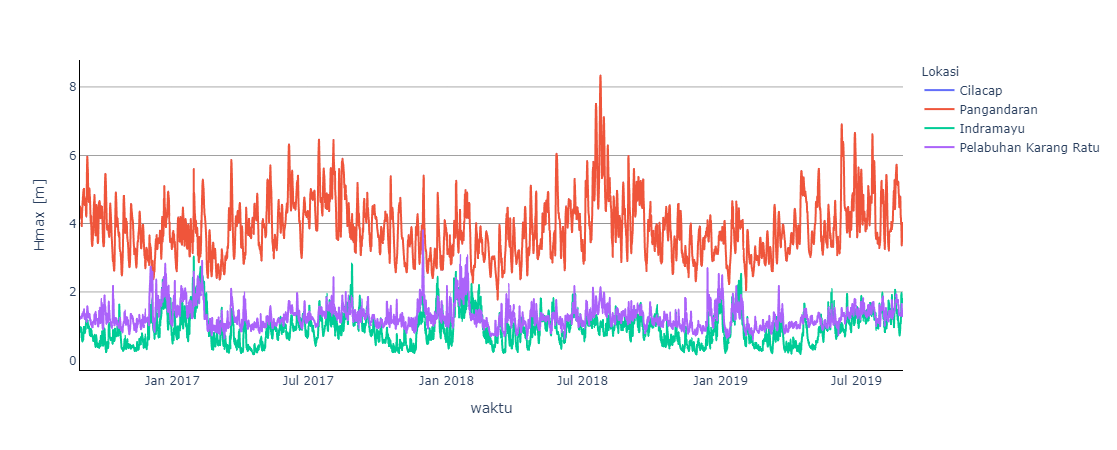

In [62]:
# Using plotly.express
import plotly.express as px

fig = px.line(df_list_data_interim, labels={
    'value':'Hmax [m]',
    'index':'Tahun',
    'variable':'Lokasi'
})
fig.update_layout({
    'plot_bgcolor':'rgba(0,0,0,0)',
    'paper_bgcolor':'rgba(0,0,0,0)'
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='black')
fig.show()

### Insight
Jika melihat data Hmax di Pelabuhan Karang Ratu **Ungu** dan Indramayu **Hijau**, pada bulan Desember, ada lonjakan nilai yg sangat tinggi, yakni mencapai 4 m (Pelabuhan Karang Ratu) dan 3,2 m (Indramayu). Lalu apa sebenarnya yang menyebabkan adanya lonjakan tersebut?, Untuk jawabannya dapat dilihat pada situs [Berita CNN](https://www.cnnindonesia.com/nasional/20171219143956-20-263481/cuaca-ekstrem-laut-jawa-nelayan-diminta-tak-melaut-tiga-hari)

### Aggregasi data per bulan

In [63]:
df_list_data_interim_by_month = df_list_data_interim.reset_index()
df_list_data_interim_by_month['waktu'] = df_list_data_interim_by_month['waktu'].astype('str')

df_list_data_interim_by_month[['year', 'month','day']] = df_list_data_interim_by_month['waktu'].str.split('-', expand=True)
df_list_data_interim_by_month.head()

waktu   Cilacap  Pangandaran  Indramayu  \
0  2016-08-31 00:00:00  4.501797     4.501797   0.832473   
1  2016-08-31 06:00:00  4.450129     4.450129   0.964294   
2  2016-08-31 12:00:00  4.446947     4.446947   0.885959   
3  2016-08-31 18:00:00  4.332702     4.332702   0.869292   
4  2016-09-01 00:00:00  4.229518     4.229518   0.936566   

   Pelabuhan Karang Ratu  year month          day  
0               1.213088  2016    08  31 00:00:00  
1               1.237027  2016    08  31 06:00:00  
2               1.260361  2016    08  31 12:00:00  
3               1.246270  2016    08  31 18:00:00  
4               1.244906  2016    09  01 00:00:00

In [64]:
# Aggregating data by month, with mean value
df_list_data_interim_by_month = pd.pivot_table(df_list_data_interim_by_month, index=['month'], aggfunc= np.mean)

display(df_list_data_interim_by_month)

Cilacap  Indramayu  Pangandaran  Pelabuhan Karang Ratu
month                                                         
01     3.682700   1.300982     3.682700               1.620497
02     3.225365   1.063015     3.225365               1.172262
03     3.324341   0.649700     3.324341               1.110731
04     3.762673   0.603210     3.762673               1.102420
05     3.968638   0.934797     3.968638               1.154385
06     4.387427   1.040911     4.387427               1.291781
07     4.783822   1.135970     4.783822               1.406102
08     4.431689   1.226792     4.431689               1.395465
09     4.232636   0.942930     4.232636               1.271888
10     3.724441   0.655378     3.724441               1.167427
11     3.356318   0.554575     3.356318               1.130487
12     3.427966   1.059074     3.427966               1.465244

In [65]:
import matplotlib

def plot_bar(data, lokasi, warna):
    matplotlib.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,5))
    data.plot(kind='bar', color=warna)
    
    plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0)
    plt.xlabel('Bulan', fontsize=16)
    plt.ylabel('Hmax [m]', fontsize=16)
    plt.ylim(0,6)
    daerah = 'Rata-rata Hmax per Bulan di ' + lokasi + '\nTahun 2016-2019'
    plt.title(daerah, fontsize=16, fontweight='bold')


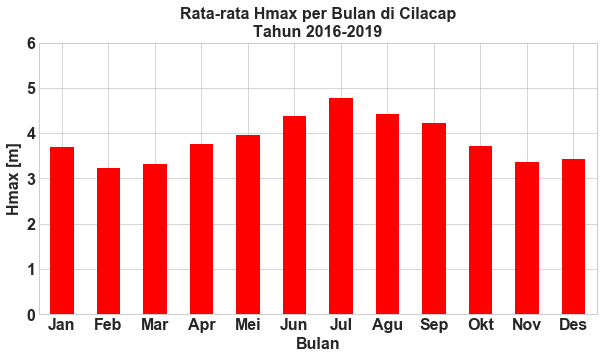

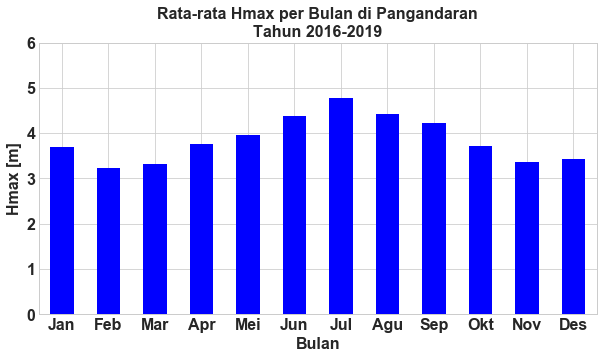

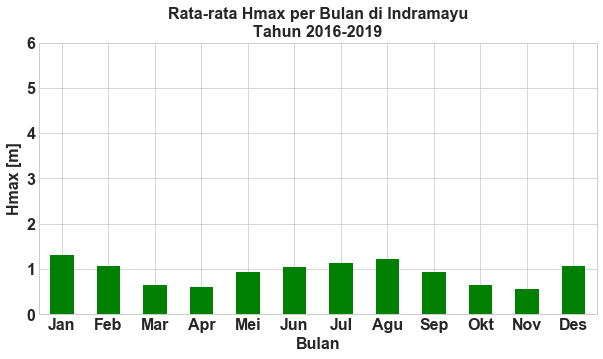

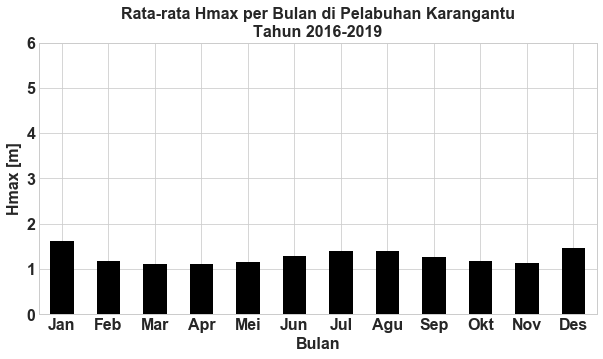

In [66]:
plot_bar(df_list_data_interim_by_month['Cilacap'], lokasi='Cilacap', warna='red')
plot_bar(df_list_data_interim_by_month['Pangandaran'], lokasi='Pangandaran', warna='blue')
plot_bar(df_list_data_interim_by_month['Indramayu'], lokasi='Indramayu', warna='green')
plot_bar(df_list_data_interim_by_month['Pelabuhan Karang Ratu'], lokasi='Pelabuhan Karangantu', warna='black')

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 2016-2019')

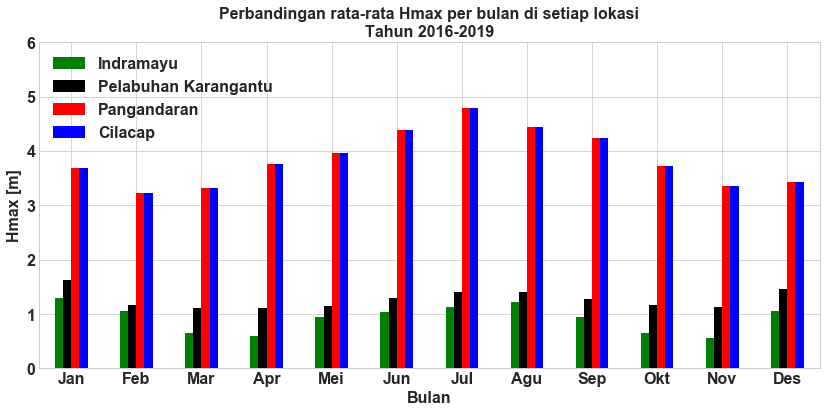

In [67]:
matplotlib.style.use('seaborn-whitegrid')
df_list_data_interim_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.legend(['Indramayu','Pelabuhan Karangantu','Pangandaran','Cilacap'])
plt.title('Perbandingan rata-rata Hmax per bulan di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')

### Agregasi data per musim

In [68]:
# Agregasi data berdasarkan musim
df_list_data_interim_by_season = pd.DataFrame(columns=['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'])
df_list_data_interim_by_season.loc['DJF'] = df_list_data_interim_by_month.iloc[[-1,0,1]].mean(axis=0)
df_list_data_interim_by_season.loc['MAM'] = df_list_data_interim_by_month.iloc[[2,3,4]].mean(axis=0)
df_list_data_interim_by_season.loc['JJA'] = df_list_data_interim_by_month.iloc[[5,6,7]].mean(axis=0)
df_list_data_interim_by_season.loc['SON'] = df_list_data_interim_by_month.iloc[[8,9,10]].mean(axis=0)
df_list_data_interim_by_season

Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu
DJF  3.445344     3.445344   1.141024               1.419334
MAM  3.685217     3.685217   0.729236               1.122512
JJA  4.534313     4.534313   1.134558               1.364449
SON  3.771132     3.771132   0.717628               1.189934

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2016-2019')

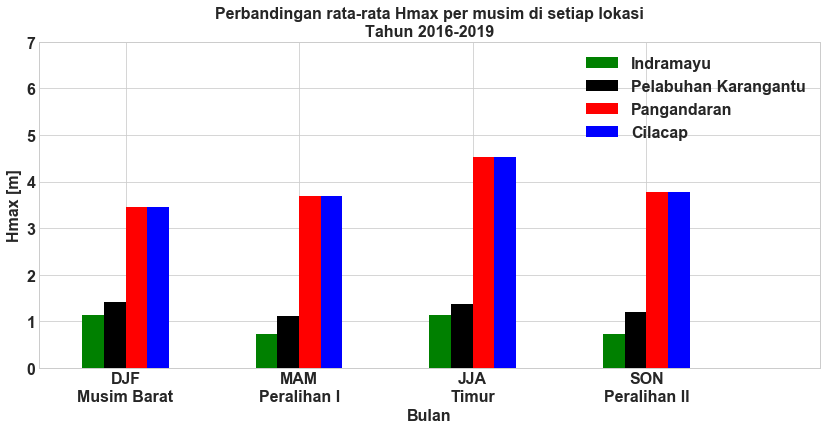

In [69]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data_interim_by_season[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['DJF\nMusim Barat','MAM\nPeralihan I','JJA\nTimur','SON\nPeralihan II'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,7)
plt.legend(['Indramayu','Pelabuhan Karangantu','Pangandaran','Cilacap'])
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')

In [70]:
df_list_data_interim_by_season_T = df_list_data_interim_by_season.transpose()
df_list_data_interim_by_season_T

DJF       MAM       JJA       SON
Cilacap                3.445344  3.685217  4.534313  3.771132
Pangandaran            3.445344  3.685217  4.534313  3.771132
Indramayu              1.141024  0.729236  1.134558  0.717628
Pelabuhan Karang Ratu  1.419334  1.122512  1.364449  1.189934

Text(0.5, 1.0, 'Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2016-2019')

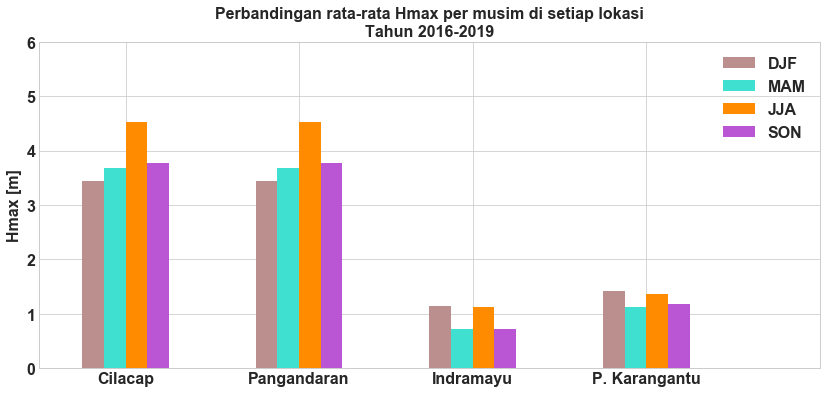

In [71]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_data_interim_by_season_T.plot(
                               kind='bar', 
                               color=['rosybrown','turquoise','darkorange','mediumorchid'], 
                               figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['Cilacap','Pangandaran','Indramayu','P. Karangantu'], 
               rotation=0
)

#plt.xlabel('Lokasi', fontsize=16)
plt.ylabel('Hmax [m]', fontsize=16)
plt.ylim(0,6)
plt.title('Perbandingan rata-rata Hmax per musim di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')

### Insight
Ada perbedaan hasil agregasi per musim untuk data INTERIM 6 jam dan ERA 5 1 bulan. Pada INTERIM, musim paling ekstrem untuk Perairan Indramayu dan Pelabuhan Karang Ratu terjadi pada musim DJF, sedangkan untuk data ERA 5, terjadi pada musim JJA.

### Pengolahan Data Angin Interim

In [72]:
nc_wind = nc4.Dataset('wind_indo_0817_0819.nc', 'r')
nc_wind.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (401,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (121,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (4384,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, latitude, longitude)
     scale_factor: 0.0016488649835918784
     add_offset: 3.203757781863673
     _FillValue: -32767
     missing_value: -32767
     units: m s**-1
     long_name: 10 metre U wi

In [73]:
# set wind velocity values into variable
u10_interim = nc_wind.variables['u10'][:]
v10_interim = nc_wind.variables['v10'][:]

print('=== shape each variables ===')
print('u10: ', u10_interim.shape)
print('v10: ', v10_interim.shape)

=== shape each variables ===
u10:  (4384, 121, 401)
v10:  (4384, 121, 401)


In [74]:
# make dataframe for desired location
# u10 component
u10_interim_cilacap = pd.DataFrame(u10_interim[:,104,72], columns=['Cilacap']).set_index(time_interim['waktu'])
u10_interim_pangandaran = pd.DataFrame(u10_interim[:,104,72], columns=['Pangandaran']).set_index(time_interim['waktu'])
u10_interim_indramayu = pd.DataFrame(u10_interim[:,88,64], columns=['Indramayu']).set_index(time_interim['waktu'])
u10_interim_ratu = pd.DataFrame(u10_interim[:,88,48], columns=['Pelabuhan Karang Ratu']).set_index(time_interim['waktu'])

# v10 component
v10_interim_cilacap = pd.DataFrame(v10_interim[:,104,72], columns=['Cilacap']).set_index(time_interim['waktu'])
v10_interim_pangandaran = pd.DataFrame(v10_interim[:,104,72], columns=['Pangandaran']).set_index(time_interim['waktu'])
v10_interim_indramayu = pd.DataFrame(v10_interim[:,88,64], columns=['Indramayu']).set_index(time_interim['waktu'])
v10_interim_ratu = pd.DataFrame(v10_interim[:,88,48], columns=['Pelabuhan Karang Ratu']).set_index(time_interim['waktu'])

display(u10_interim_ratu.head())
display(v10_interim_ratu.head())

Pelabuhan Karang Ratu
waktu                                     
2016-08-31 00:00:00              -1.830227
2016-08-31 06:00:00              -1.934106
2016-08-31 12:00:00               0.384199
2016-08-31 18:00:00               0.801362
2016-09-01 00:00:00              -1.533431

Pelabuhan Karang Ratu
waktu                                     
2016-08-31 00:00:00               0.898084
2016-08-31 06:00:00               0.543610
2016-08-31 12:00:00               0.107798
2016-08-31 18:00:00               1.349963
2016-09-01 00:00:00               2.241671

### Calculate wind magnitude
mag = sqrt(u10^2 + v10^2)

In [75]:
mag_interim_cilacap = np.sqrt(u10_interim_cilacap**2 + v10_interim_cilacap**2)
mag_interim_pangandaran= np.sqrt(u10_interim_pangandaran**2 + v10_interim_pangandaran**2)
mag_interim_indramayu = np.sqrt(u10_interim_indramayu**2 + v10_interim_indramayu**2)
mag_interim_ratu = np.sqrt(u10_interim_ratu**2 + v10_interim_ratu**2)

mag_interim_ratu.head()

Pelabuhan Karang Ratu
waktu                                     
2016-08-31 00:00:00               2.038697
2016-08-31 06:00:00               2.009049
2016-08-31 12:00:00               0.399035
2016-08-31 18:00:00               1.569899
2016-09-01 00:00:00               2.715972

In [76]:
df_list_mag_interim = pd.concat([mag_interim_cilacap,
                                 mag_interim_pangandaran,
                                 mag_interim_indramayu,
                                 mag_interim_ratu], axis=1)

df_list_mag_interim.head()

Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu
waktu                                                                       
2016-08-31 00:00:00  4.110254     4.110254   3.899910               2.038697
2016-08-31 06:00:00  3.594318     3.594318   4.236703               2.009049
2016-08-31 12:00:00  5.628421     5.628421   4.041502               0.399035
2016-08-31 18:00:00  4.225401     4.225401   2.442785               1.569899
2016-09-01 00:00:00  4.275777     4.275777   3.906246               2.715972

In [77]:
# save file
mag_interim_cilacap['Cilacap'].to_csv('Angin_interim_cilacap.csv')
mag_interim_pangandaran['Pangandaran'].to_csv('Angin_interim_pangandaran.csv')
mag_interim_indramayu['Indramayu'].to_csv('Angin_interim_indramayu.csv')
mag_interim_ratu['Pelabuhan Karang Ratu'].to_csv('Angin_interim_karangantu.csv')

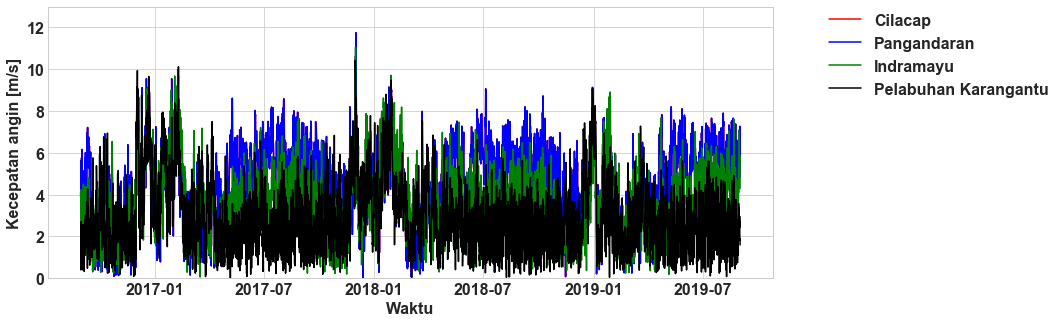

In [79]:
# overlay all data from each location
fig, ax = plt.subplots(figsize=(13,5))

matplotlib.style.use('seaborn-whitegrid')
plt.plot(mag_interim_cilacap, linewidth=1.5, color='red', label='Cilacap')
plt.plot(mag_interim_pangandaran, linewidth=1.5, color='blue', label='Pangandaran')
plt.plot(mag_interim_indramayu, linewidth=1.5, color='green', label='Indramayu')
plt.plot(mag_interim_ratu, linewidth=1.5, color='black', label='Pelabuhan Karang Ratu')
plt.xlabel('Waktu', fontsize=16)
plt.ylabel('Kecepatan angin [m/s]', fontsize=16)
plt.ylim(0, np.round(np.max(df_list_mag_interim.max())+1))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
#plt.xticks([0, 731, 1461, 2192, 2923, 3653, 4384], 
#           ['Agu 2016', 'Feb 2017', 'Agu 2017', 'Feb 2018', 'Agu 2018', 'Jan 2019','Agu 2019'])
#plt.grid()
plt.legend(['Cilacap','Pangandaran','Indramayu','Pelabuhan Karangantu'], bbox_to_anchor=(1.4, 1.03))
#plt.legend(bbox_to_anchor=(1.05, 1.0))


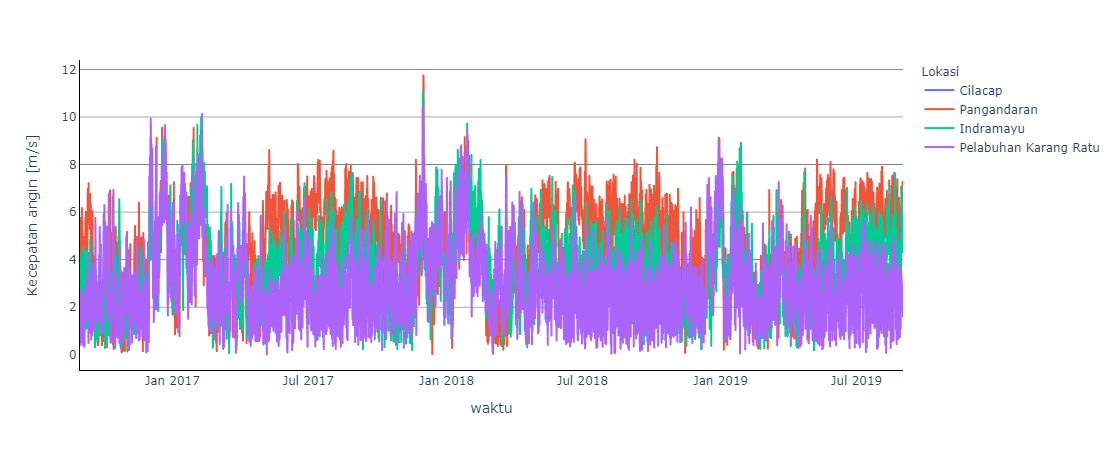

In [80]:
# Using plotly.express
import plotly.express as px

fig = px.line(df_list_mag_interim, labels={
    'value':'Kecepatan angin [m/s]',
    'index':'Tahun',
    'variable':'Lokasi'
})
fig.update_layout({
    'plot_bgcolor':'rgba(0,0,0,0)',
    'paper_bgcolor':'rgba(0,0,0,0)'
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='black')
fig.show()

### Agregasi data per bulan

In [81]:
df_list_mag_interim_by_month = df_list_mag_interim.reset_index()
df_list_mag_interim_by_month['waktu'] = df_list_mag_interim_by_month['waktu'].astype('str')

df_list_mag_interim_by_month[['year', 'month','day']] = df_list_mag_interim_by_month['waktu'].str.split('-', expand=True)
df_list_mag_interim_by_month.head()

waktu   Cilacap  Pangandaran  Indramayu  \
0  2016-08-31 00:00:00  4.110254     4.110254   3.899910   
1  2016-08-31 06:00:00  3.594318     3.594318   4.236703   
2  2016-08-31 12:00:00  5.628421     5.628421   4.041502   
3  2016-08-31 18:00:00  4.225401     4.225401   2.442785   
4  2016-09-01 00:00:00  4.275777     4.275777   3.906246   

   Pelabuhan Karang Ratu  year month          day  
0               2.038697  2016    08  31 00:00:00  
1               2.009049  2016    08  31 06:00:00  
2               0.399035  2016    08  31 12:00:00  
3               1.569899  2016    08  31 18:00:00  
4               2.715972  2016    09  01 00:00:00

In [82]:
# Aggregating data by month, with mean value
df_list_mag_interim_by_month = pd.pivot_table(df_list_mag_interim_by_month, index=['month'], aggfunc= np.mean)

display(df_list_mag_interim_by_month)

Cilacap  Indramayu  Pangandaran  Pelabuhan Karang Ratu
month                                                         
01     4.875907   5.149257     4.875907               4.535220
02     3.727620   4.299220     3.727620               3.230156
03     2.803793   3.021663     2.803793               3.028683
04     3.499080   2.772298     3.499080               2.738651
05     5.614886   3.605302     5.614886               2.402393
06     5.423980   3.810982     5.423980               2.399114
07     5.950622   4.052577     5.950622               2.291784
08     5.820717   4.263287     5.820717               2.293921
09     4.985701   3.398548     4.985701               2.244236
10     4.160965   2.712045     4.160965               2.616883
11     3.428520   2.520909     3.428520               2.823197
12     4.576223   4.365608     4.576223               4.692459

Text(0.5, 1.0, 'Perbandingan rata-rata kecepatan angin per bulan di setiap lokasi\nTahun 2016-2019')

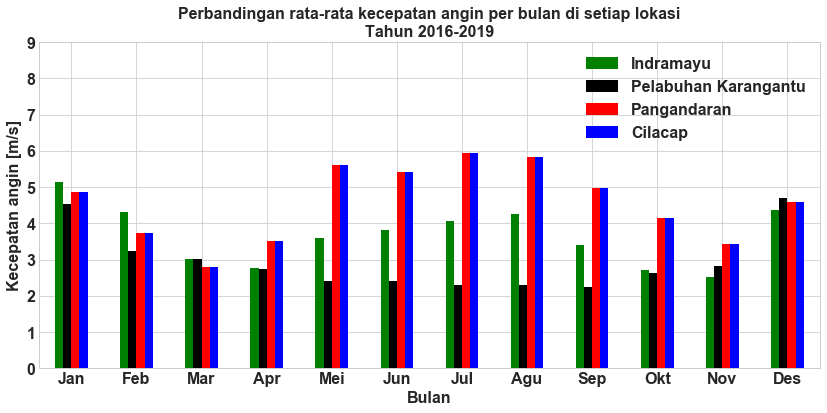

In [83]:
matplotlib.style.use('seaborn-whitegrid')
df_list_mag_interim_by_month[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,12,1)), 
               ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Kecepatan angin [m/s]', fontsize=16)
plt.ylim(0,9)
plt.legend(['Indramayu','Pelabuhan Karangantu','Pangandaran','Cilacap'])
plt.title('Perbandingan rata-rata kecepatan angin per bulan di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')

In [84]:
# Agregasi data berdasarkan musim
df_list_mag_interim_by_season = pd.DataFrame(columns=['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu'])
df_list_mag_interim_by_season.loc['DJF'] = df_list_mag_interim_by_month.iloc[[-1,0,1]].mean(axis=0)
df_list_mag_interim_by_season.loc['MAM'] = df_list_mag_interim_by_month.iloc[[2,3,4]].mean(axis=0)
df_list_mag_interim_by_season.loc['JJA'] = df_list_mag_interim_by_month.iloc[[5,6,7]].mean(axis=0)
df_list_mag_interim_by_season.loc['SON'] = df_list_mag_interim_by_month.iloc[[8,9,10]].mean(axis=0)
df_list_mag_interim_by_season

Cilacap  Pangandaran  Indramayu  Pelabuhan Karang Ratu
DJF  4.393250     4.393250   4.604695               4.152612
MAM  3.972586     3.972586   3.133088               2.723242
JJA  5.731773     5.731773   4.042282               2.328273
SON  4.191729     4.191729   2.877168               2.561438

Text(0.5, 1.0, 'Perbandingan rata-rata kecepatan angin per musim di setiap lokasi\nTahun 2016-2019')

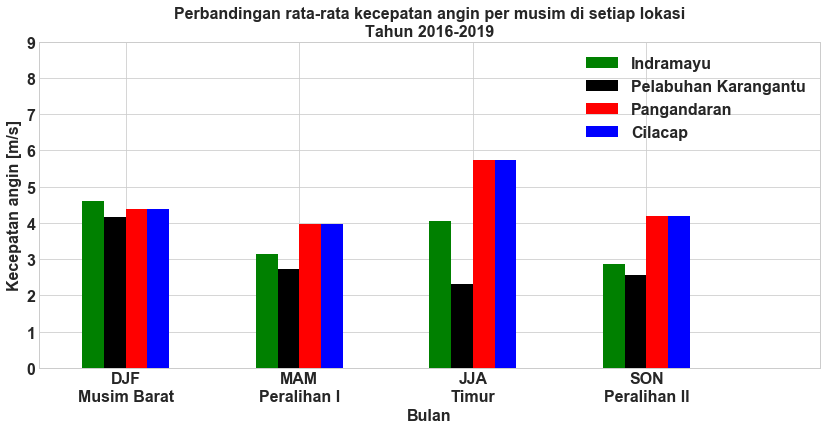

In [85]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_mag_interim_by_season[['Indramayu','Pelabuhan Karang Ratu','Pangandaran','Cilacap']].plot(
                                                        kind='bar', 
                                                        color=['green','black','red','blue'], 
                                                        figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['DJF\nMusim Barat','MAM\nPeralihan I','JJA\nTimur','SON\nPeralihan II'], 
               rotation=0
)

plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Kecepatan angin [m/s]', fontsize=16)
plt.ylim(0,9)
plt.legend(['Indramayu','Pelabuhan Karangantu','Pangandaran','Cilacap'])
plt.title('Perbandingan rata-rata kecepatan angin per musim di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')

In [86]:
df_list_mag_interim_by_season_T = df_list_mag_interim_by_season.transpose()
df_list_mag_interim_by_season_T

DJF       MAM       JJA       SON
Cilacap                4.393250  3.972586  5.731773  4.191729
Pangandaran            4.393250  3.972586  5.731773  4.191729
Indramayu              4.604695  3.133088  4.042282  2.877168
Pelabuhan Karang Ratu  4.152612  2.723242  2.328273  2.561438

Text(0.5, 1.0, 'Perbandingan rata-rata kecepatan angin per musim di setiap lokasi\nTahun 2016-2019')

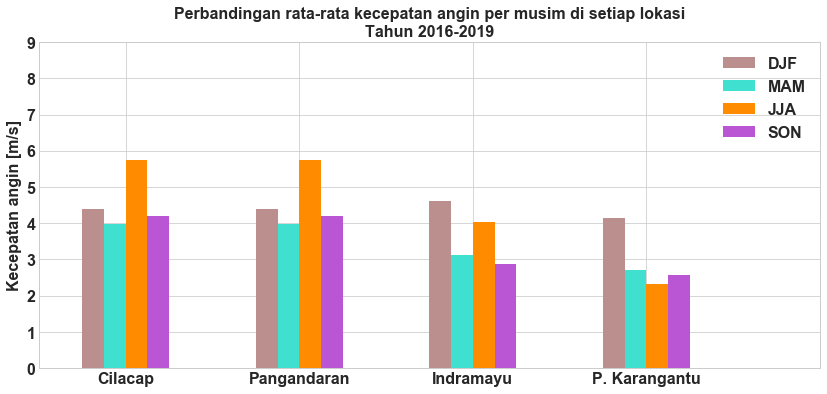

In [87]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_mag_interim_by_season_T.plot(
                               kind='bar', 
                               color=['rosybrown','turquoise','darkorange','mediumorchid'], 
                               figsize=(14,6)
)

plt.xticks(list(np.arange(0,5,1)), 
               ['Cilacap','Pangandaran','Indramayu','P. Karangantu'], 
               rotation=0
)

#plt.xlabel('Lokasi', fontsize=16)
plt.ylabel('Kecepatan angin [m/s]', fontsize=16)
plt.ylim(0,9)
plt.title('Perbandingan rata-rata kecepatan angin per musim di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')

### Insight
- Kecepatan angin di Selatan Jawa terlihat lebih besar dibanding Utara Jawa
- Untuk Selatan Jawa, angin paling tinggi kecepatannya terjadi pada musim JJA
- Untuk Utara Jawa, angin paling tinggi kecepatannya terjadi pada musim DJF

## Analisis Hmax dan Angin

In [88]:
from scipy.stats import pearsonr
corr_cilacap, _ = pearsonr(hmax_interim_cilacap['Cilacap'], mag_interim_cilacap['Cilacap'])
corr_pangandaran, _ = pearsonr(hmax_interim_pangandaran['Pangandaran'], mag_interim_pangandaran['Pangandaran'])
corr_indramayu, _ = pearsonr(hmax_interim_indramayu['Indramayu'], mag_interim_indramayu['Indramayu'])
corr_rat = pearsonr(hmax_interim_cilacap['Cilacap'], mag_interim_cilacap['Cilacap'])

In [89]:
# overlay plot hmax dan kecepatan angin
def plot_hmax_angin(hmax, angin, lokasi, color):
    fig, ax = plt.subplots(2, figsize=(13,8), sharex=True)
    matplotlib.style.use('seaborn-whitegrid')
    fig.suptitle('Hmax vs Kecepatan Angin di '+lokasi, fontsize=16, fontweight='bold')
    ax[0].plot(hmax, color=color)
    ax[1].plot(angin, color='darkcyan')
    ax[0].set_ylabel('Hmax [m]', fontsize=16)
    ax[1].set_ylabel('Kecepatan angin [m/s]', fontsize=16)
    ax[0].set_ylim(0,angin.max()+1)
    ax[1].set_ylim(0,angin.max()+1)
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))

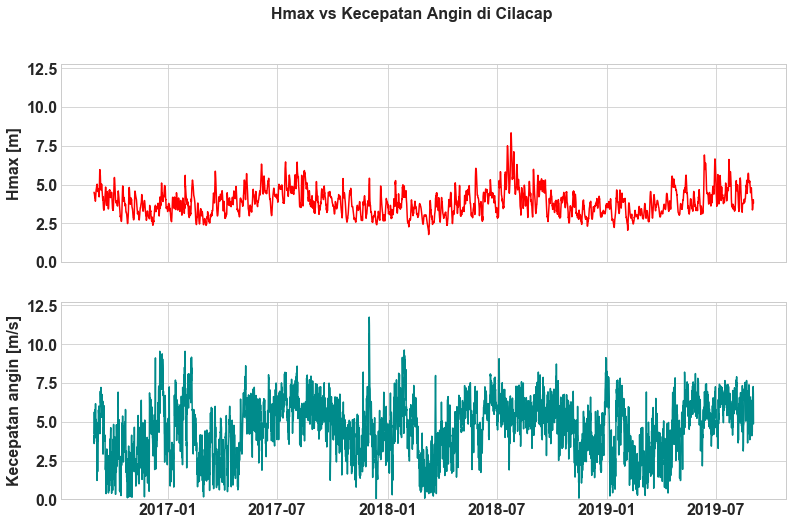

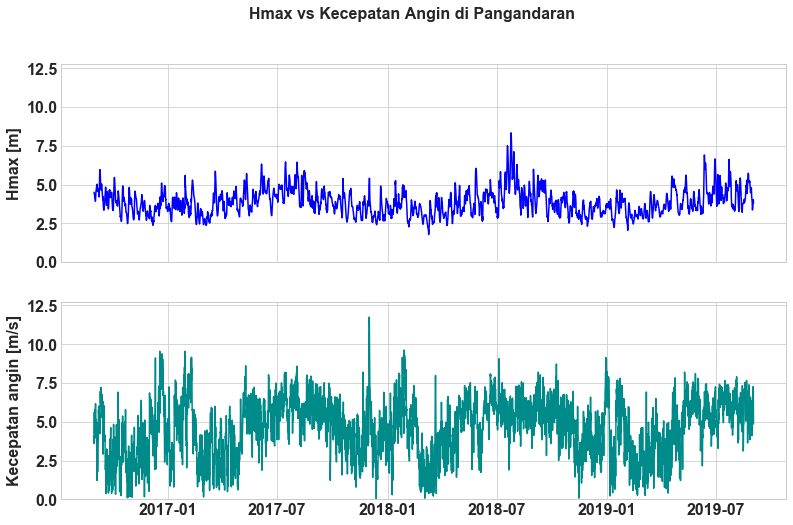

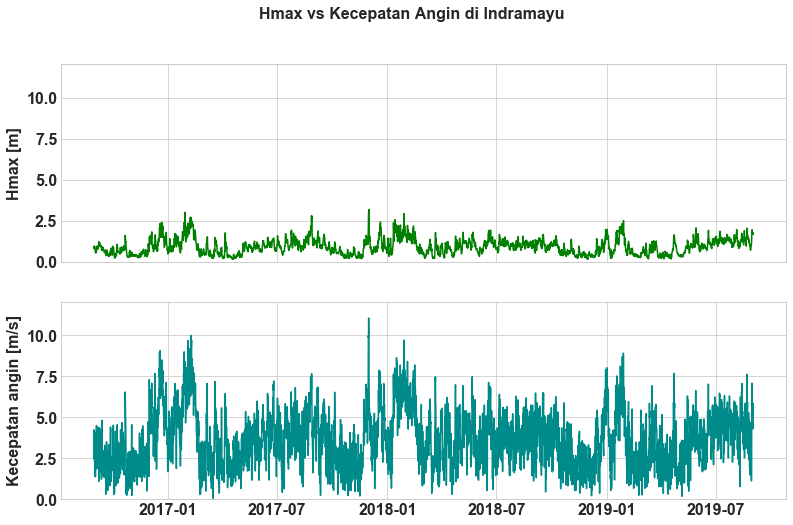

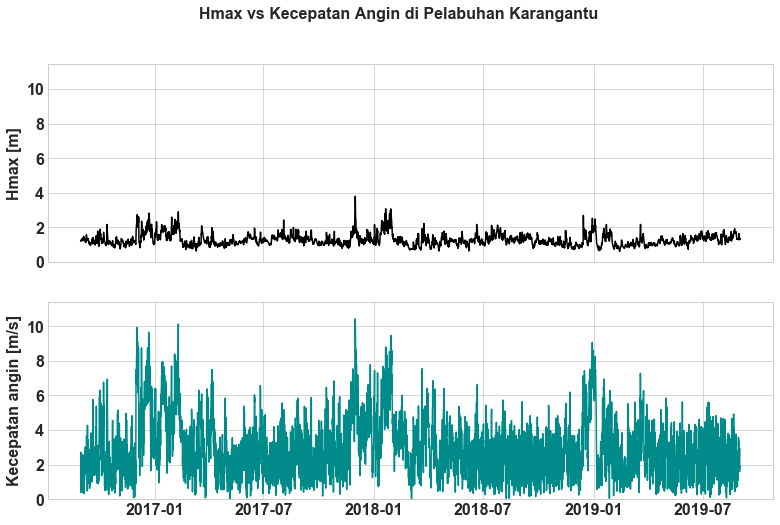

In [90]:
plot_hmax_angin(hmax_interim_cilacap['Cilacap'], mag_interim_cilacap['Cilacap'], lokasi='Cilacap', color='red')
plot_hmax_angin(hmax_interim_pangandaran['Pangandaran'], mag_interim_pangandaran['Pangandaran'], lokasi='Pangandaran', color='blue')
plot_hmax_angin(hmax_interim_indramayu['Indramayu'], mag_interim_indramayu['Indramayu'], lokasi='Indramayu', color='green')
plot_hmax_angin(hmax_interim_ratu['Pelabuhan Karang Ratu'], mag_interim_ratu['Pelabuhan Karang Ratu'], lokasi='Pelabuhan Karangantu', color='black')

In [91]:
from scipy.stats import pearsonr
corr_cilacap, _ = pearsonr(hmax_interim_cilacap['Cilacap'], mag_interim_cilacap['Cilacap'])
corr_pangandaran, _ = pearsonr(hmax_interim_pangandaran['Pangandaran'], mag_interim_pangandaran['Pangandaran'])
corr_indramayu, _ = pearsonr(hmax_interim_indramayu['Indramayu'], mag_interim_indramayu['Indramayu'])
corr_ratu, _ = pearsonr(hmax_interim_ratu['Pelabuhan Karang Ratu'], mag_interim_ratu['Pelabuhan Karang Ratu'])

lokasi = ['Cilacap','Pangandaran','Indramayu','Pelabuhan Karang Ratu']
df_list_cor = pd.DataFrame(np.array([corr_cilacap, corr_pangandaran, corr_indramayu, corr_ratu]), columns=['Korelasi'], index=lokasi)

df_list_cor

Korelasi
Cilacap                0.432282
Pangandaran            0.432282
Indramayu              0.826357
Pelabuhan Karang Ratu  0.606209

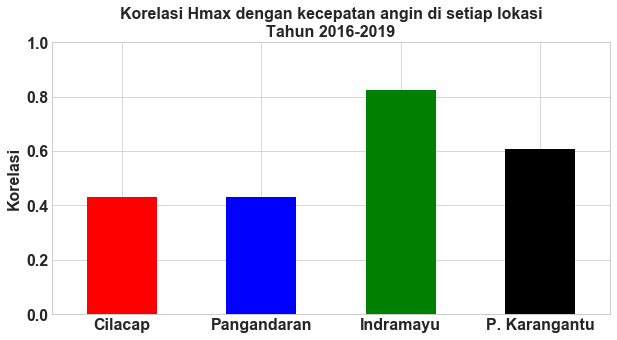

In [92]:
# plot diagram bar
matplotlib.style.use('seaborn-whitegrid')
df_list_cor.plot(
                kind='bar', 
                color='rbgk', 
                figsize=(10,5)
)

plt.xticks(list(np.arange(0,4,1)), 
               ['Cilacap','Pangandaran','Indramayu','P. Karangantu'], 
               rotation=0
)

#plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Korelasi', fontsize=16)
plt.ylim(0,1)
plt.title('Korelasi Hmax dengan kecepatan angin di setiap lokasi\nTahun 2016-2019', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.3, 1.0)).remove()

### Insight
Dari diagram bar di atas, kita bisa tahu kalau:
- Korelasi di Utara Jawa cenderung lebih tinggi dibandingkan Selatan Jawa
- Korelasi paling tinggi ada pada Indramayu

Apa yg menyebabkan hal tsb terjadi?, perlu diketahui bahwa **Hmax** disini adalah gabungan antara **swell** dan **seas**, sedangkan data angin yg digunakan adalah **angin lokal**, yg dalam hal ini hanya berperan dalam pembangkitan **seas**. Disini kita bisa tahu kalau **swell** memiliki kontribusi yg signifikan terhadap kondisi gelombang yg berhadapan/dekat dengan **laut terbuka**, seperti yg dapat dilihat pada map dibawah.

Selain itu, ada 3 hal yang mempengaruhi pembangkitan tinggi gelombang laut, yaitu:
- **Magnitudo kecepatan angin**
- **Ukuran fetch** (daerah pembangkitan angin)
- **Durasi angin ber-hembus**

In [93]:
my_map

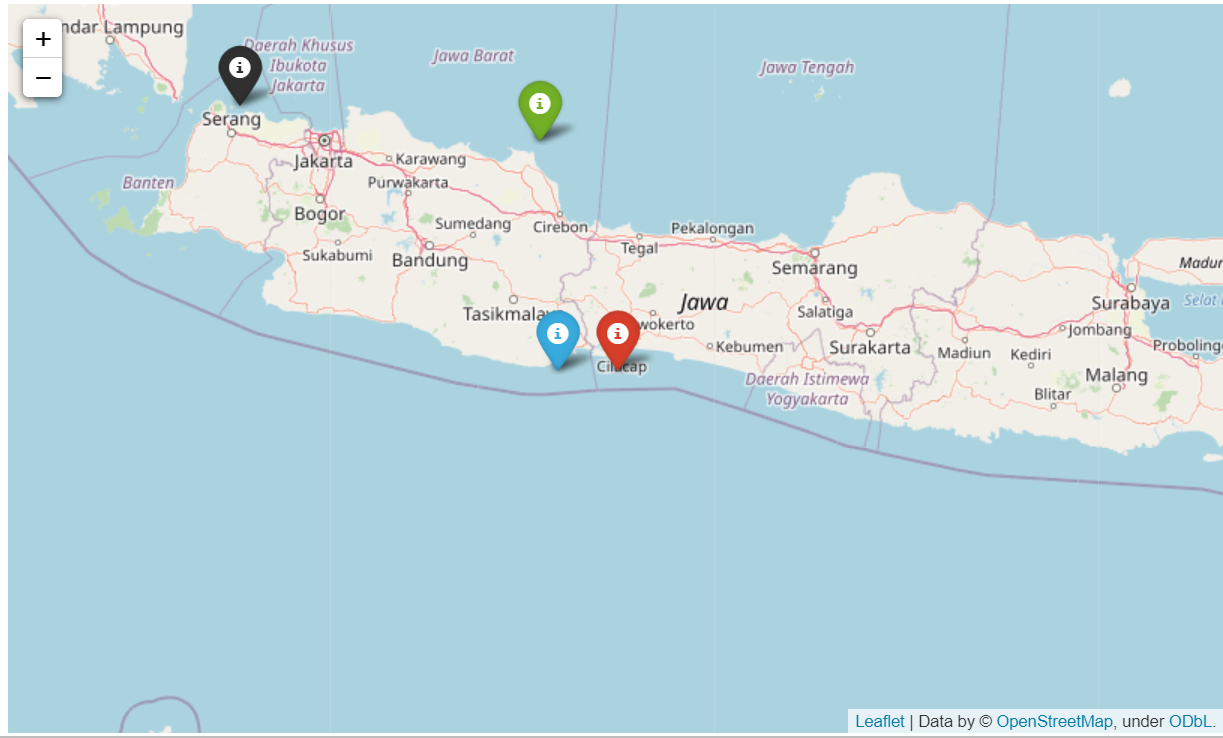

In [94]:
from IPython.display import Image, display
display(Image(filename='lokasi.png', embed=True))

### Legend Lokasi
- **Merah: Cilacap**
- **Biru: Pangandaran**
- **Hijau: Indramayu**
- **Hitam: Pelabuhan Karang Ratu**

## Data Siklon
Diperlukan data siklon di sekitar Laut Cina Selatan, Filipina, dan Samudra Hindia. Berikut situs referensi untuk mencari kejadian siklon:
- http://agora.ex.nii.ac.jp/digital-typhoon/search_geo.html.en


In [95]:
hmax_interim_cilacap.head()

Cilacap
waktu                        
2016-08-31 00:00:00  4.501797
2016-08-31 06:00:00  4.450129
2016-08-31 12:00:00  4.446947
2016-08-31 18:00:00  4.332702
2016-09-01 00:00:00  4.229518

In [96]:
# kejadian siklon di samudra hindia dan lcs
siklon = pd.read_csv('kejadian_siklon_2016_2019.csv')

siklon.head()

No    Code     Name          Birth (UTC)            End (UTC)  \
0   1  201901    PABUK  2019-01-01 06:00:00  2019-01-04 18:00:00   
1   2  201727   TEMBIN  2017-12-20 18:00:00  2017-12-25 12:00:00   
2   3  201726  KAI-TAK  2017-12-14 00:00:00  2017-12-21 12:00:00   
3   4  201719  DOKSURI  2017-09-12 12:00:00  2017-09-16 00:00:00   
4   5  201704    TALAS  2017-07-15 06:00:00  2017-07-17 12:00:00   

  Min. Press (hPa) Max. Wind (knots)  
0              996                45  
1              970                70  
2              994                40  
3              955                80  
4              985                50

In [97]:
siklon.drop(['No','Code','Min. Press (hPa)','Max. Wind (knots)'], axis=1, inplace=True)
siklon.head()

Name          Birth (UTC)            End (UTC)
0    PABUK  2019-01-01 06:00:00  2019-01-04 18:00:00
1   TEMBIN  2017-12-20 18:00:00  2017-12-25 12:00:00
2  KAI-TAK  2017-12-14 00:00:00  2017-12-21 12:00:00
3  DOKSURI  2017-09-12 12:00:00  2017-09-16 00:00:00
4    TALAS  2017-07-15 06:00:00  2017-07-17 12:00:00

In [98]:
siklon['Birth (UTC)'] = pd.to_datetime(siklon['Birth (UTC)'])
siklon['End (UTC)'] = pd.to_datetime(siklon['End (UTC)'])

siklon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         15 non-null     object        
 1   Birth (UTC)  15 non-null     datetime64[ns]
 2   End (UTC)    15 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 488.0+ bytes


In [99]:
siklon = siklon.set_index('Name')
siklon = siklon.transpose()

In [100]:
# siklon di samudra hindia
siklon_hindia = siklon.iloc[:,7:]

# siklon di laut cina selatan
siklon_lcs = siklon.iloc[:,:7]

display(siklon_hindia)
display(siklon_lcs)

Name                    Wallace      Riley     noname              Marcus  \
Birth (UTC) 2019-04-05 18:00:00 2019-01-24 2017-04-06 2018-03-15 12:00:00   
End (UTC)   2019-04-10 00:00:00 2019-01-31 2017-04-16 2018-03-24 12:00:00   

Name            Yvette            Savannah     Dahlia            Veronica  
Birth (UTC) 2016-12-19 2019-03-13 18:00:00 2017-11-26 2019-03-19 12:00:00  
End (UTC)   2016-12-23 2019-03-17 18:00:00 2017-12-03 2019-03-26 00:00:00

Name                      PABUK              TEMBIN             KAI-TAK  \
Birth (UTC) 2019-01-01 06:00:00 2017-12-20 18:00:00 2017-12-14 00:00:00   
End (UTC)   2019-01-04 18:00:00 2017-12-25 12:00:00 2017-12-21 12:00:00   

Name                    DOKSURI               TALAS            NOCK-TEN  \
Birth (UTC) 2017-09-12 12:00:00 2017-07-15 06:00:00 2016-12-21 18:00:00   
End (UTC)   2017-09-16 00:00:00 2017-07-17 12:00:00 2016-12-27 18:00:00   

Name                     SARIKA  
Birth (UTC) 2016-10-13 18:00:00  
End (UTC)   2016-10-19 06:00:00

In [105]:
import datetime as dt

# overlay plot hmax dan kecepatan angin
def plot_hmax_angin_siklon_hindia(hmax, angin, lokasi, color):
    fig, ax = plt.subplots(2, figsize=(13,8), sharex=True)
    matplotlib.style.use('seaborn-whitegrid')
    fig.suptitle('Hmax vs Kecepatan Angin di '+lokasi, fontsize=16, fontweight='bold')
    ax[0].plot(hmax, color=color)
    ax[0].axvline(dt.datetime(2019,4,10), color='black')
    ax[0].axvline(dt.datetime(2019,1,31), color='black')
    ax[0].axvline(dt.datetime(2017,4,16), color='black')
    ax[0].axvline(dt.datetime(2018,3,24), color='black')
    ax[0].axvline(dt.datetime(2016,12,23), color='black')
    ax[0].axvline(dt.datetime(2019,3,17), color='black')
    ax[0].axvline(dt.datetime(2017,12,3), color='black')
    ax[0].axvline(dt.datetime(2019,3,26), color='black')
    
    ax[1].plot(angin, color='darkcyan')
    ax[1].axvline(dt.datetime(2019,4,10), color='black')
    ax[1].axvline(dt.datetime(2019,1,31), color='black')
    ax[1].axvline(dt.datetime(2017,4,16), color='black')
    ax[1].axvline(dt.datetime(2018,3,24), color='black')
    ax[1].axvline(dt.datetime(2016,12,23), color='black')
    ax[1].axvline(dt.datetime(2019,3,17), color='black')
    ax[1].axvline(dt.datetime(2017,12,3), color='black')
    ax[1].axvline(dt.datetime(2019,3,26), color='black')
    ax[0].set_ylabel('Hmax [m]', fontsize=16)
    ax[1].set_ylabel('Kecepatan angin [m/s]', fontsize=16)
    ax[0].set_ylim(0,angin.max()+1)
    ax[1].set_ylim(0,angin.max()+1)
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))

In [106]:
# overlay plot hmax dan kecepatan angin
def plot_hmax_angin_siklon_lcs(hmax, angin, lokasi, color):
    fig, ax = plt.subplots(2, figsize=(13,8), sharex=True)
    matplotlib.style.use('seaborn-whitegrid')
    fig.suptitle('Hmax vs Kecepatan Angin di '+lokasi, fontsize=16, fontweight='bold')
    ax[0].plot(hmax, color=color)
    ax[0].axvline(dt.datetime(2019,1,4), color='red')
    ax[0].axvline(dt.datetime(2017,12,25), color='red')
    ax[0].axvline(dt.datetime(2017,12,21), color='red')
    ax[0].axvline(dt.datetime(2017,9,16), color='red')
    ax[0].axvline(dt.datetime(2017,7,17), color='red')
    ax[0].axvline(dt.datetime(2016,12,27), color='red')
    ax[0].axvline(dt.datetime(2016,10,19), color='red')
    
    ax[1].plot(angin, color='darkcyan')
    ax[1].axvline(dt.datetime(2019,1,4), color='red')
    ax[1].axvline(dt.datetime(2017,12,25), color='red')
    ax[1].axvline(dt.datetime(2017,12,21), color='red')
    ax[1].axvline(dt.datetime(2017,9,16), color='red')
    ax[1].axvline(dt.datetime(2017,7,17), color='red')
    ax[1].axvline(dt.datetime(2016,12,27), color='red')
    ax[1].axvline(dt.datetime(2016,10,19), color='red')

    ax[0].set_ylabel('Hmax [m]', fontsize=16)
    ax[1].set_ylabel('Kecepatan angin [m/s]', fontsize=16)
    ax[0].set_ylim(0,angin.max()+1)
    ax[1].set_ylim(0,angin.max()+1)
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))

### Plot Kejadian Siklon

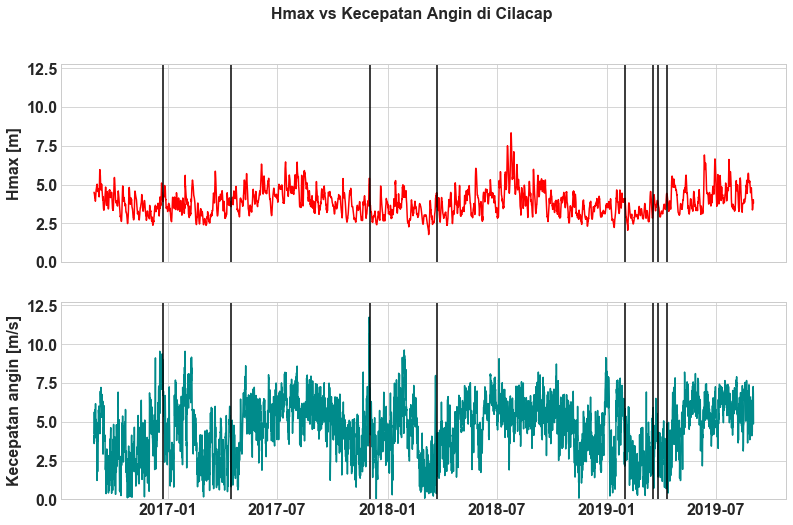

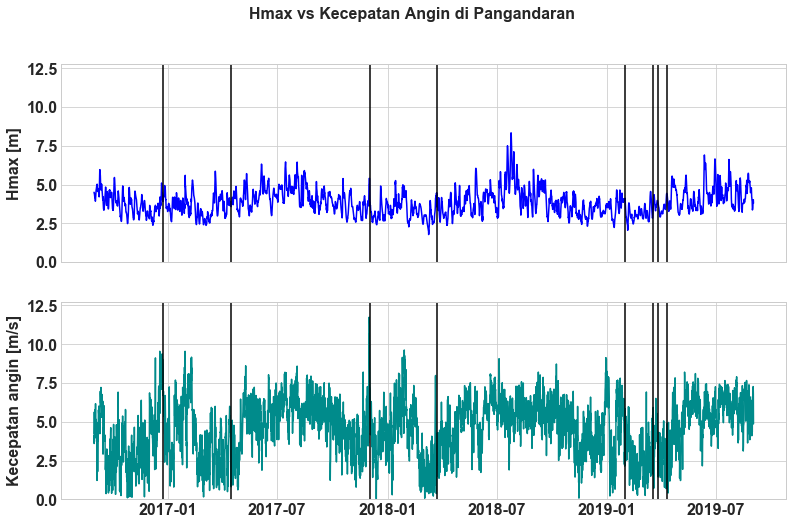

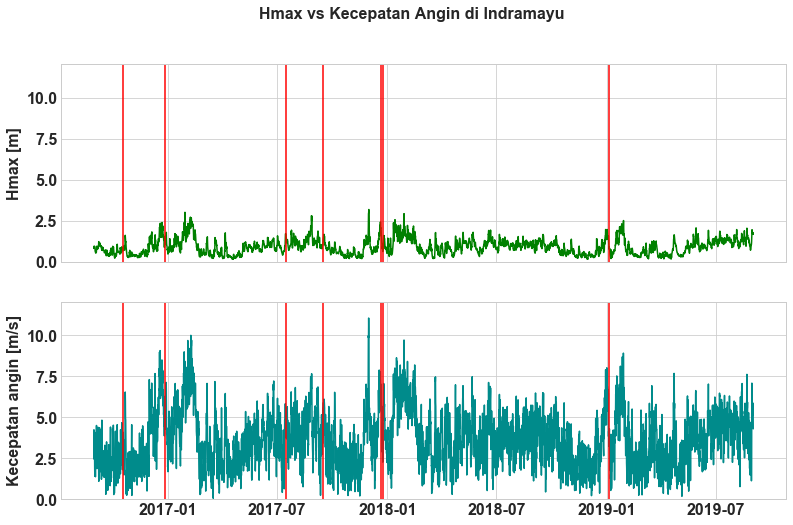

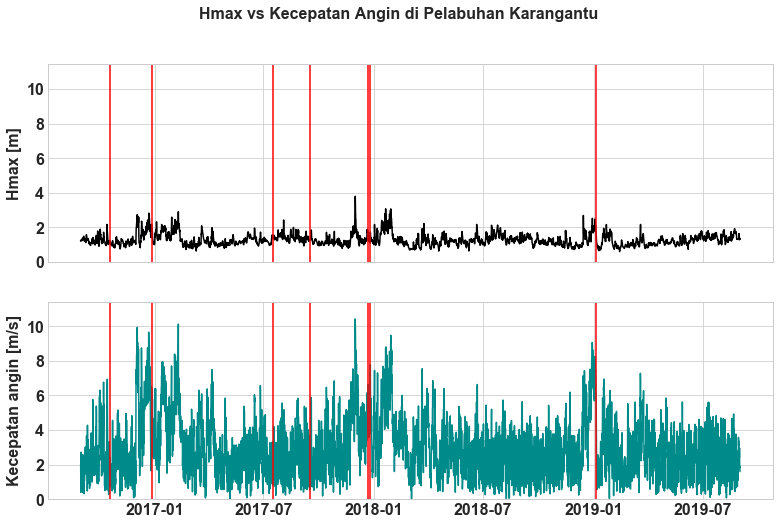

In [107]:
plot_hmax_angin_siklon_hindia(hmax_interim_cilacap['Cilacap'], mag_interim_cilacap['Cilacap'], lokasi='Cilacap', color='red')
plot_hmax_angin_siklon_hindia(hmax_interim_pangandaran['Pangandaran'], mag_interim_pangandaran['Pangandaran'], lokasi='Pangandaran', color='blue')
plot_hmax_angin_siklon_lcs(hmax_interim_indramayu['Indramayu'], mag_interim_indramayu['Indramayu'], lokasi='Indramayu', color='green')
plot_hmax_angin_siklon_lcs(hmax_interim_ratu['Pelabuhan Karang Ratu'], mag_interim_ratu['Pelabuhan Karang Ratu'], lokasi='Pelabuhan Karangantu', color='black')